# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Marin Adil- [marin.adil@ulb.be](mailto:student1@ulb.ac.be) - Student ID 000425304
### Frank Mukwege - __[fmukwege@ulb.be](mailto:fmukwege@ulb.ac.be) - Student ID 000425438__
### Nadia Bernair - __[nadia.bernair@ulb.be](mailto:student3@ulb.ac.be) - Student ID 401958__

### Video presentation: www.youtube.com/abcd1234

## Pump it Up: Data Mining the Water Table


- Part 1 : Preprocessing and Feature selection 
- Part 2 : Model selection procedure - Classifier architecture
- Part 3 : Other model selection and learning techniques - Comparison with the previous classifier
- Part 4 : Final test set 

### NOTE FOR PROFESSORS : the cells where there are [PROFESSORS], are cells or portion of code that took a long time to run. We provided you with the graphs, screen captures of the results to stay in the 30min runtime rule. If you still want to run the cell to assess the result, you just have to uncomment them

# Part 1 : Preprocessing and Feature selection

# Introduction

Data are available on the drivenData website. 3 dataset are available  : 

    Test set values: The set of waterpump on which prediction should be performed 

    Training set labels: The set of label for the training set 

    Training set values: The set of training data



In [1]:
### Save the dataset and the label in dataframes . 
data_raw <- read.csv("training_set_values.csv",stringsAsFactors = F);
training_set_labels <- read.csv('training_set_labels.csv');
data_raw_df <- (data_raw); 
### install packages if necessary 
# install.packages("stringr")
# install.packages("dummies")
# install.packages("rpart")
# install.packages("ggplot2") 
# install.packages("e1071")#SVM
# install.packages("kernlab")#Support Vector Machines with Radial Basis Function Kernel
# install.packages("caret")#To train test easily
# install.packages("MASS")# Linear Discriminant Analysis
# install.packages("ranger")
# install.packages("readr") #to open the data set
# install.packages("plyr")
# install.packages("nnet")
# install.packages("randomForest")
# install.packages("rpart.plot")
# install.packages("dummies")
# install.packages("IRdisplay")
# install.packages("tictoc")

# Library
library(stringr)
library(dummies)
library(rpart)
library(ggplot2) 
library(e1071)#SVM
library(kernlab)#Support Vector Machines with Radial Basis Function Kernel
library(caret)#To train test easily
library(MASS)# Linear Discriminant Analysis
library(ranger)
library(readr) #to open the data set
library(plyr)
library(nnet)
library(randomForest)
library(rpart.plot)
library(dummies)
library(IRdisplay)
library(tictoc)

Warning message:
"package 'stringr' was built under R version 3.6.3"dummies-1.5.6 provided by Decision Patterns

Warning message:
"package 'rpart' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"
Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'MASS' was built under R version 3.6.3"Warning message:
"package 'ranger' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'plyr' was built under R version 3.6.3"Warning message:
"package 'nnet' was built under R version 3.6.3"Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14


Useful functions

In [2]:
errorRateFromConfusionMatrix <- function(confusion_matrix){
    if(dim(confusion_matrix)[1] == 3){ 
         errorRate <-((confusion_matrix[1,2]+confusion_matrix[1,3]) +(confusion_matrix[2,1]+confusion_matrix[2,3]) +(confusion_matrix[3,1]+confusion_matrix[3,2]))/sum(confusion_matrix)
    }

    
     # else if (dim(confusion_matrix)[1] == 2 && dim(confusion_matrix)[2] == 3 ){
      #     accuracy <- (confusion_matrix[1,2] + confusion_matrix[1,3])/(confusion_matrix[1,2]+ confusion_matrix[1,3]+ confusion_matrix[1,1]) + (confusion_matrix[2,1] + confusion_matrix[2,3])/(confusion_matrix[2,2]+ confusion_matrix[2,3]+ confusion_matrix[2,1]);
    #}

    else{
       errorRate <- 1;
    }
    
    return(errorRate);
}


In [3]:
accuracyFromConfusionMatrix <- function(confusion_matrix){
    if(dim(confusion_matrix)[1] == 3 && dim(confusion_matrix)[2] == 3 ){ #3x3  case
       accuracy <- (confusion_matrix[1,1]+confusion_matrix[2,2]+confusion_matrix[3,3])/sum(confusion_matrix); #(Tp+Tn)/(Fp+Fn+Tp+Tn)      
    }
    if(dim(confusion_matrix)[1] == 2 && dim(confusion_matrix)[2] == 3 ){ #2x3 case
       accuracy <- (confusion_matrix[1,1]+confusion_matrix[2,3])/sum(confusion_matrix);
    }
    if(dim(confusion_matrix)[1] == 3 && dim(confusion_matrix)[2] == 2 ){#3x2 case
       accuracy <- (confusion_matrix[1,1]+confusion_matrix[3,2])/sum(confusion_matrix);
    }
    else if(dim(confusion_matrix)[1] == 2 && dim(confusion_matrix)[2] == 2 ){ #2x2 case
       accuracy <- (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix);
    }
    else if(dim(confusion_matrix)[1] == 1 && dim(confusion_matrix)[2] == 2 ){ #1x2 case
       accuracy <- (confusion_matrix[1,1])/sum(confusion_matrix);
    }
    return(accuracy);
}

In [4]:
confusion_matrixDT<- function(Y.hat,Y,threshold,pos,neg){
   ## For Decisions Trees (DT) : compute 2x2 confusion matrix and return the accuracy and Balanced Error Rate  
    Y.hat.predict <- ifelse(Y.hat[,1] > threshold,pos,neg)
    table(Y.hat.predict)
    table(Y)
    confusion_matrix <- table(Y.hat.predict,Y)
    print(confusion_matrix)

    print(paste("accuracy of the DT is :",accuracyFromConfusionMatrix(confusion_matrix)))
    if(dim(confusion_matrix)[1] == 2 && dim(confusion_matrix)[2] == 2 ){
        print(paste("Balance Accurarcy Rate of the DT is :",1-1/2*((confusion_matrix[2,1]/table(Y)[2])+(confusion_matrix[1,2]/table(Y)[1]))))         
    }
    return(accuracyFromConfusionMatrix(confusion_matrix))
}
confusion_matrixNN<- function(Y.hat,Y,threshold,pos,neg){
   ## For Neural Networks (NN) : compute 2x2 confusion matrix and return the accuracy and Balanced Error Rate 
    Y.hat.predict <- ifelse(Y.hat[,1] > threshold,pos,neg)

    #Y.hat.predict[which(Y.hat[,1] > threshold & Y.hat[,2]> 0.07001)] <-  "functional needs repair"
    table(Y.hat.predict)
    table(Y)
    confusion_matrix <- table(Y.hat.predict,Y)
    print(confusion_matrix)

    print(paste("accuracy of the neural net is :",accuracyFromConfusionMatrix(confusion_matrix)))
    if(dim(confusion_matrix)[1] == 2 && dim(confusion_matrix)[2] == 2 ){
        print(paste("Balance Accurarcy Rate of the Neural Net is :",1-1/2*((confusion_matrix[2,1]/table(Y)[2])+(confusion_matrix[1,2]/table(Y)[1]))))         
    }
    return(accuracyFromConfusionMatrix(confusion_matrix))
}

# Data preprocessing


## First glance on the dataset with excel

In total, there are 40  columns and 59401 row. The first columns is the index of the waterpump, and the first row is the features name. So there are 39 features and 59400 waterpump available. 

At first glance, three features can be remove :"wpt_name", "num_private"  and "recorded_by". 
The  first one gives the name of the waterpump  and almost every one has a different name. 
"recorded by" contains always the same information : "GeoData Consultants Ltd".
And finaly "num_private" is 0 for  58643 waterpump  ( on 59400  )




In [5]:
Remove_irrelevant <- function(dataset){
    ############################################################################################
    #function that remove irrelevant feature
    #input : complet dataset
    #output : same dataset as at the input without "wpt_name","recorded_by" and "num_private"
    ###########################################################################################
    newdata <- dataset;
    newdata[,"wpt_name"] <- NULL   #Remove "wpt_name"
    newdata[,"recorded_by" ] <- NULL  #Remove "recorded_by"
    newdata[,"num_private" ] <- NULL  #Remove "recorded_by"
    return(newdata)
    }

 ## Missing value imputation

The missing numericals data will be replaced by the average value of the corresponding feature. In the same way, waterpump for which their is missing data in categorical features will be removed. This function is quite long because each feature has been studied separately.

In [6]:
#TO clean the testset --------------- USED ONLY AT THE END
data_cleaning_2 <- function(dataset){
      ######################################################################################################################
  # function which replace, by the average value the missing,  numericals data and remove waterpump for which their is #
  # missing categorical data.                                                                                          #
  # Input : Dataframe containing the data to be processed.                                                             #
  # Output : cleaned dataframe                                                                                         #
  ######################################################################################################################
  # Data cleaning function : 
  d_labels <- labels(dataset);
  newdata <- dataset;
  for(i in 1:ncol(dataset)){
    feature_label <-d_labels[[2]][i] ;
    #print(feature_label)
    switch (feature_label,
            "longitude" = newdata[which(newdata[,feature_label] == 0.00000),feature_label] <- mean(newdata[,feature_label],na.rm = T), 
            "latitude" = newdata[which(newdata[,feature_label] == -0.00000002),feature_label] <- mean(newdata[,feature_label],na.rm = T), 
            "construction_year" = newdata[which(newdata[,feature_label] == 0),feature_label] <- mean(newdata[,feature_label],na.rm = T), 
            "recorded_by" =  newdata[,feature_label] <- NULL, #recorded_by is redundant FIND
            #"id" =  newdata[,feature_label] <- NULL, #recorded_by is redundant FIND
            "num_private" =  newdata[,feature_label] <- NULL, #recorded_by is redundant FIND
            #"scheme_name" =  newdata <- newdata[ -which(newdata[,feature_label] == ""), ], I LOST HALF OF Observations
            "population" = newdata[which(newdata[,feature_label] == 0),feature_label] <- mean(newdata[,feature_label],na.rm = T), 
    )
  }
 
  return(newdata)
}


In [7]:

data_cleaning <- function(dataset){
  ######################################################################################################################
  # function which replace, by the average value the missing,  numericals data and remove waterpump for which their is #
  # missing categorical data.                                                                                          #
  # Input : Dataframe containing the data to be processed.                                                             #
  # Output : cleaned dataframe                                                                                         #
  ######################################################################################################################
  d_labels <- labels(dataset);
  newdata <- dataset;
  for(i in 1:ncol(dataset)){
    feature_label <-d_labels[[2]][i] ;
    switch (feature_label,
            "funder" = { newdata <- newdata[ -which(dataset[,feature_label] == ""), ]
                       newdata <- newdata[ -which(dataset[,feature_label] == 0 )]},
              
            "longitude" = newdata[which(newdata[,feature_label] == 0.00000),feature_label] <- mean(newdata[,feature_label],na.rm = T), 
            
            
            "latitude" = newdata[which(newdata[,feature_label] == -0.00000002),feature_label] <- mean(newdata[,feature_label],na.rm = T),
            
            
            "construction_year" = newdata[which(newdata[,feature_label] == 0),feature_label] <- median(newdata[,feature_label],na.rm = T), 
            
            
            "permit" = newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
            "subvillage" = newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
            "installer" = { newdata <- newdata[ -which(dataset[,feature_label] == ''), ]
                       newdata <- newdata[ -which(dataset[,feature_label] == 0 )]},
            
              
            "public_meeting" = newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],

            "scheme_management" = newdata <- newdata[ -which(newdata[,feature_label] == ''), ],
            
            "population" = newdata[which(newdata[,feature_label] == 0),feature_label] <- mean(newdata[,feature_label],na.rm = T), 

          
  
            'region_code'= newdata[which(newdata[,feature_label] == ""),feature_label] <- mean(newdata[,feature_label],na.rm = T),
            
            
           'district_code'= newdata[which(newdata[,feature_label] == ""),feature_label] <- mean(newdata[,feature_label],na.rm = T),
            
        
            "management_group" = newdata <- newdata[ -which(newdata[,feature_label] == "unknown"), ],
            
          
            
            "quality_group" = newdata <- newdata[ -which(newdata[,feature_label] == "unknown"), ], 
            
            
            "quantity" = newdata <- newdata[ -which(newdata[,feature_label] == "unknown"), ],
            
            
            
            "source_class" =newdata <- newdata[ -which(newdata[,feature_label] == "unknown"), ], 
            
           # "extraction_type_class" = newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
           # 'source'=newdata <- newdata[ -which(newdata[,feature_label] == "unknown" ), ],
            
           # 'source_type'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
           # 'waterpoint_type'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
             #'date_recorded'= newdata[ -which(newdata[,feature_label] == ''), ] <- mean(newdata[,feature_label],na.rm = T), 
            
           # 'basin'=  newdata[-which(newdata[,feature_label] == ''), ],
            
           #  'region'= newdata <- newdata[ -(newdata[,feature_label] == ''), ],  
           
                        #"waterpoint_type_group" =newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],

            
            
            
           #'payment'=newdata <- newdata[ -which(newdata[,feature_label] =='' ), ],
            
            #'payment_type'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
            #'water_quality'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
            #'quality_group'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],  
               # 'lga'= newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
           # 'ward'= newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
           #  'scheme_name'=newdata <- newdata[ -which(newdata[,feature_label] =='' ), ],
            
           # 'extraction_type'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
           # 'extraction_type_group'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
            #'extraction_type_class'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
            #'management'=newdata <- newdata[ -which(newdata[,feature_label] ==  '' ), ],
            
          

            
          
           )
  }
  
  return(newdata)
}

## Feature engineering

"Date_Recorded" containt  the recorded date of the waterpump in the form of a character string. For reasons of memory and compactness, it was decided to keep only the year of registration in a integer form. 

In addition, all strings will be lowercase and spaces removed for categorical feature. 

In [8]:
character_manip <- function(dataset){
    #############################################################################
    #Function which remove space and lowcase string for  character feature 
    #Input :The complete dataset 
    # Output : The complete dataset withput space and lowcase in string 
    #############################################################################
    data_raw_df_l <- apply(dataset,2, str_to_lower)
    data_raw_df_l <- apply(dataset,2, function(x) str_replace_all(x,c(" " = "" )))

    return(data_raw_df_l)
    }
                           
 Year_recorded <- function(datas){
    #############################################################################
    #Function which keep only the year of registration of the waterpump in a integer form. 
    #Input :The complete dataset 
    # Output : The complete dataset with the "date_recorded" 
    #############################################################################
          data<-datas
     if ( sum(colnames(data) == "date_recorded") == 1 ){
    for (i in 1 : length(data[,"date_recorded"])) {
        data[i,"date_recorded"] <- substr(data[i,"date_recorded"], start=nchar(data[i,"date_recorded"])-3, stop=nchar(data[i,"date_recorded"]))
    }
   data[,"date_recorded"] <- as.integer(as.character(data[,"date_recorded"]))    }
     else {
         data <- data
     }
  return(data)
}

## Feature selection
The feature selection will done thanks to forward wrapper selection. When examining the dataset, the features were divided into groups.

Numerical data : [ amount_tsh, date_recorded,gps_height,longitude,latitude,region_code,district_code,population	and construction_year ]

Geographique data : [ basin,subvillage,region,lga,ward ]

Exctraction data : [ extraction_type,extraction_type_group,extraction_type_class ]

Source data : [ source,source_type,source_class]

Waterpoint data :[ waterpoint_type, waterpoint_type_group]

quantity data  :[ water_quality,quality_group	]

quality data : [ quantity,quantity_group ]


management data : [ management,management_group,scheme_management]

payment data : [ payment, payment_type]

other data : [ permit,public,meeting,installer,funder ]

Exception for  numerical data and other data, it has been assumed that each of these groups carries the same information. However, in each of these groups it is possible that a feature allows a better prediction when it is coupled with  others feature from other group. 
In this perspective the feature selection has been realized as follow :

1- see among the numerical data group which of them are the more relevant. 
 
2 -  on the basis of the numerical datas,choose one feature per group thanks to a wrapper selection.



## The next cell performs a wrapping between the different groups seen previously. The code runs for several hours. The output is as follows:  

### [PROFESSORS] : Ctrl + a to select all then ctrl + /  to uncomment . It takes a lot of time so we comment it, but left it here for completeness purposes

In [9]:
# Numerical   <- c ("amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year" )

# Geographique  <- c( "basin","subvillage","region","lga","ward", "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# Extraction  <- c ("extraction_type","extraction_type_group","extraction_type_class" , "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# Source  <- c ("source","source_type","source_class", "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# Waterpoint  <-c( "waterpoint_type", "waterpoint_type_group", "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# quantity  <-c ("water_quality","quality_group" , "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# quality  <- c ("quantity","quantity_group" , "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# management  <- c ("management","management_group","scheme_management", "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# payment  <- c ("payment", "payment_type", "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# other  <- c ("permit","public","meeting","installer","funder" , "amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year")

# Merged <- list(Numerical,Extraction,Source,Waterpoint,quantity,quality,management,payment)
# name <- c("Numerical","Extraction","Source","Waterpoint","quantity","quality","management","payment")
# CV_folds <- 1
# for (z in (1 : length(Merged))){
# print(paste("--------------------------------", name[z]  ,"---------------------------"))

# variables_to_keep <- c(Merged[[z]])

# data_keep <- data_raw_df[,variables_to_keep]
# data_keep$status_group <- as.factor(training_set_labels$status_group);
# data_raw_df_1 <- Remove_irrelevant(data_keep)
# data_raw_df_2 <-  Year_recorded (data_raw_df_1)
# data_raw_df_3 <- data_cleaning(data_raw_df_2)


# data_clean <- as.data.frame(unclass(data_raw_df_3),stringsAsFactors = T)
    
# prise_func <- (data_clean[which(data_clean[,"status_group"] == "functional"), ])

# prise_non_func <-  (data_clean[which(data_clean[,"status_group"] == "non functional"), ])

# prise_need_func <- ( data_clean[which(data_clean[,"status_group"] == "functional needs repair"), ])

# balanced_data <- rbind(prise_func[sample(1:nrow(prise_need_func)),],prise_non_func[sample(1:nrow(prise_need_func)),])
# balanced_data <- rbind(balanced_data,prise_need_func)
# idx <- sample(1:nrow(balanced_data))
# balanced_data <- balanced_data[idx,]
# n<-ncol(balanced_data)-1

# selected<-NULL

# # Perform up to n (number of variables) round of selection
# for (round in 1:n) { 
#     candidates<-setdiff(1:n,selected)
    
#     CV_err<-matrix(0,nrow=length(candidates),ncol=CV_folds)
    
#     # For each round, test all the candidate variables
#     for (j in 1:length(candidates)) {
#         features_to_include<-c(selected,candidates[j])
        
#         # For each variable, perform cross-validation to determine the CV-error
#         for (i in 1:CV_folds) {
            
#             idx <- sample(1:nrow(balanced_data)) # random sequence of the nb of row of the sample test, to proceed to a
#             half_split <- floor(nrow(balanced_data)*0.8)# index to split the dataset in 2 in order to perform a test-train split
#             target_variable <- ncol(data_clean) # the last colonne contains the "y", our targets that will help us to create the mapping m such thay y=m(x)

#             train_data <- balanced_data[idx[1:half_split],]  # Train data split
#             test_data <- balanced_data[idx[(half_split+1):nrow(balanced_data)],] #test data split

           
#             label <- train_data[,"status_group"]  
#             melange <- train_data[,1 : (length(train_data)-1),drop=F]
#             test <- test_data[,1 : (length(test_data)-1),drop=F]
#             test_lab <- test_data[,"status_group"]  
            
            
#             X_ts<-test[,features_to_include,drop=F] 
#             Y_ts <- test_lab

#             X_tr<-melange[,features_to_include,drop=F]
#             Y_tr<-label
            
#             # Create a dataset including only the first nb_components principal components
#             DS<-cbind(X_tr,status_group=Y_tr)
        
#             # Model fit (using lm function)
#             model<- rpart(status_group ~ .,method="class",DS)
        
#             # Model predict
#             Y_hat_ts<- predict(model,X_ts)
     
#             # Cross validation error = MSE
#             Y.hat.predict <- c()
#     for ( w in 1 : length(Y_hat_ts[,1])){
#         if (which.max (Y_hat_ts[w,]) == 1 ){Y.hat.predict[w] <- "functional" }
#         else if ( which.max ( Y_hat_ts[w,] ) == 2 ){Y.hat.predict[w] <-"functional needs repair" }
#         else if (which.max ( Y_hat_ts[w,] ) == 3) {Y.hat.predict[w] <-"non functional"}   
#         }

#             CV_err[j,i]<- errorRateFromConfusionMatrix(table(Y.hat.predict,Y_ts))
#         }
        
#     }
    
#     # Compute the mean and sd of cross-validation error across all the candidates
#     # In CV_err matrix, every row represents a candidate, and every element represents the results of the i^th CV fold.
#     CV_err_mean<-apply(CV_err,1,mean)
#     CV_err_sd<-apply(CV_err,1,sd)
    
#     # Select the candiate that minimizes the cross-validation error
#     selected_current<-which.min(CV_err_mean)              
#     selected<-c(selected,candidates[selected_current])
#     print(paste("Round ",round," ; Selected feature: ",candidates[selected_current]," ; CV error=",round(CV_err_mean[selected_current],digits=4), " ; feature =", Merged[[z]][candidates[selected_current]]))

# }}

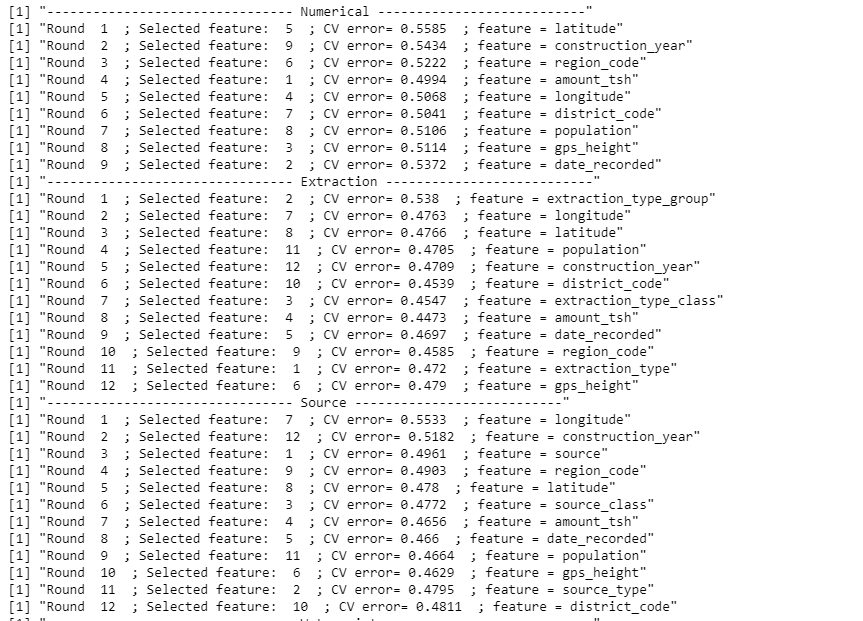

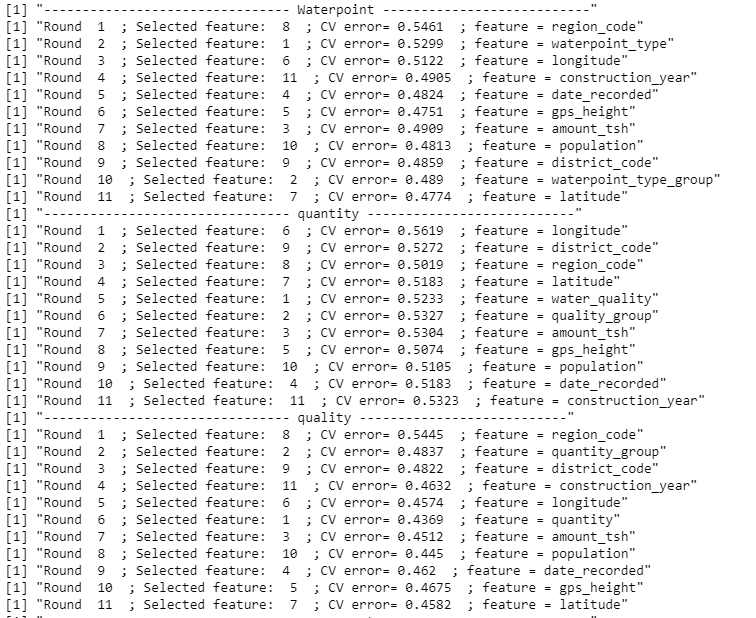

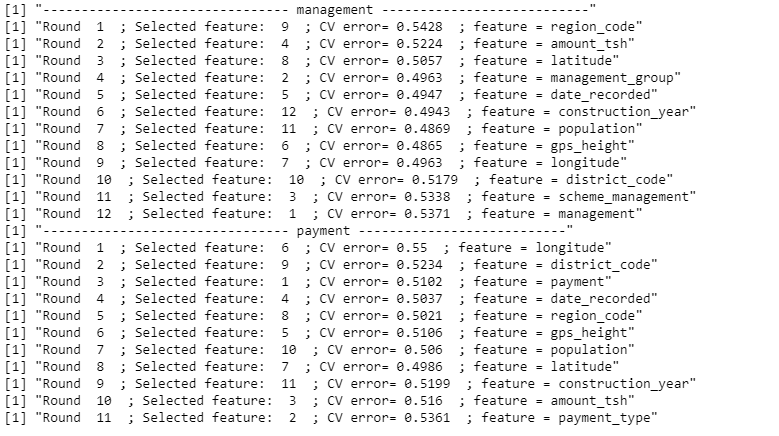

In [10]:
display_png(file="wrapper_results_1.png")
display_png(file="wrapper_results_2.png")
display_png(file="wrapper_results_3.png")

## Correlation

In order to examine a little bit further the possible links between the numerical categories and the outputs, Box plot have been drawn. 

Here are some elements visible with the boxplot :

1) The median  of  "date_recorded" is lower for  "functionnal" than for the two others. 

2) Quite consistently, the functional waterpump have a higher median for "construction_year" than the other two

3) The "gps_height"  median is higher for "functionnal" and lower for "non functionnal". 

4) Longitude of "functionnal need repair" seems lower than for the other two. 

Warning message in Year_recorded(data_raw_df_1):
"NAs introduits lors de la conversion automatique"Warning message:
"Removed 59400 rows containing non-finite values (stat_boxplot)."

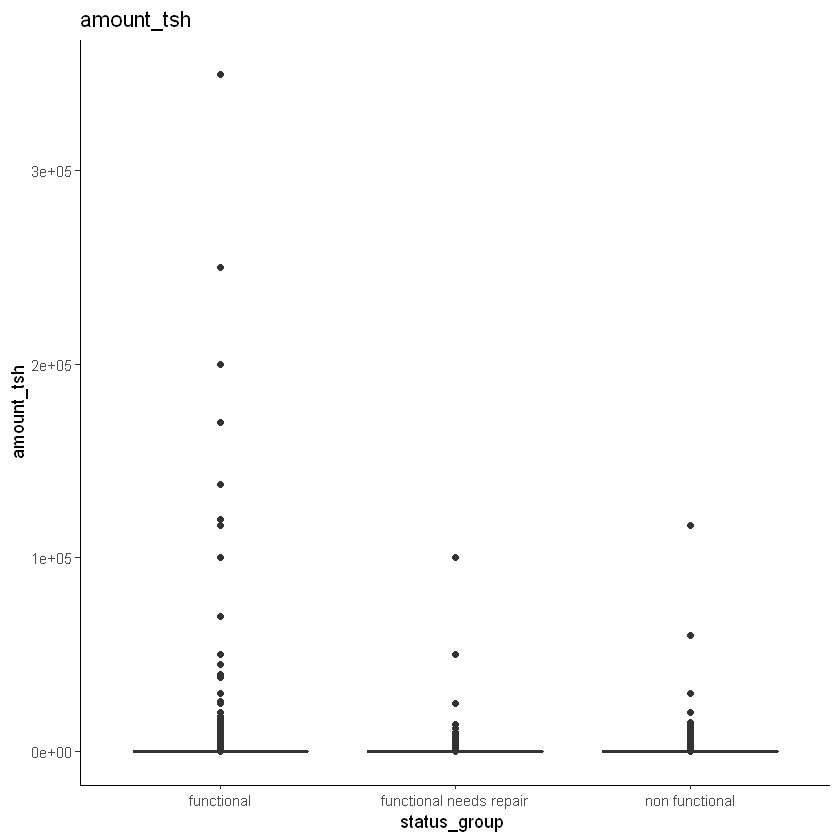

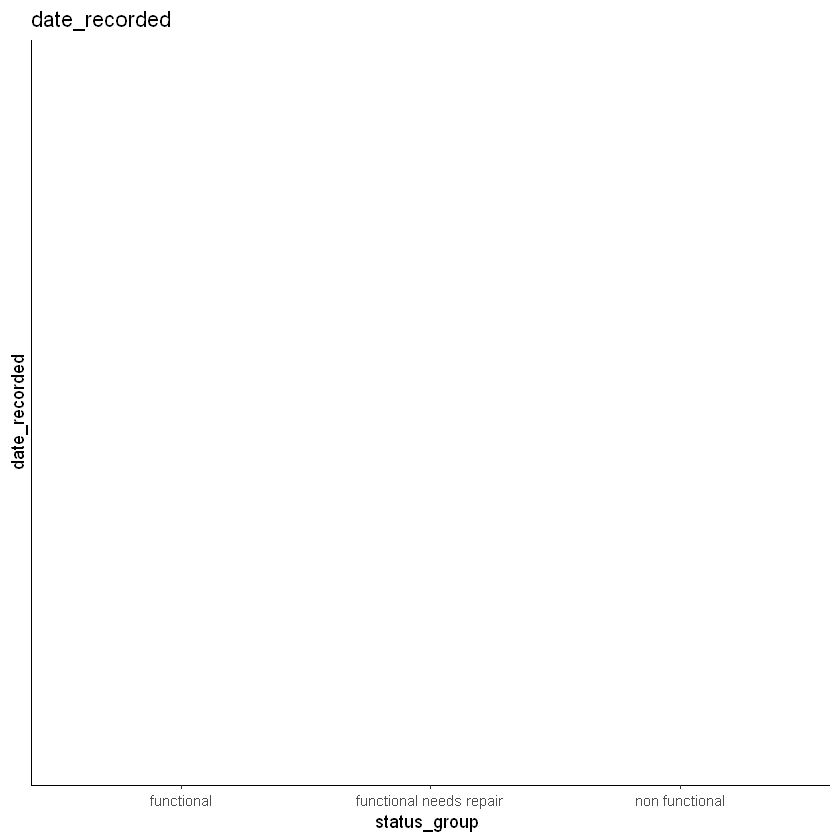

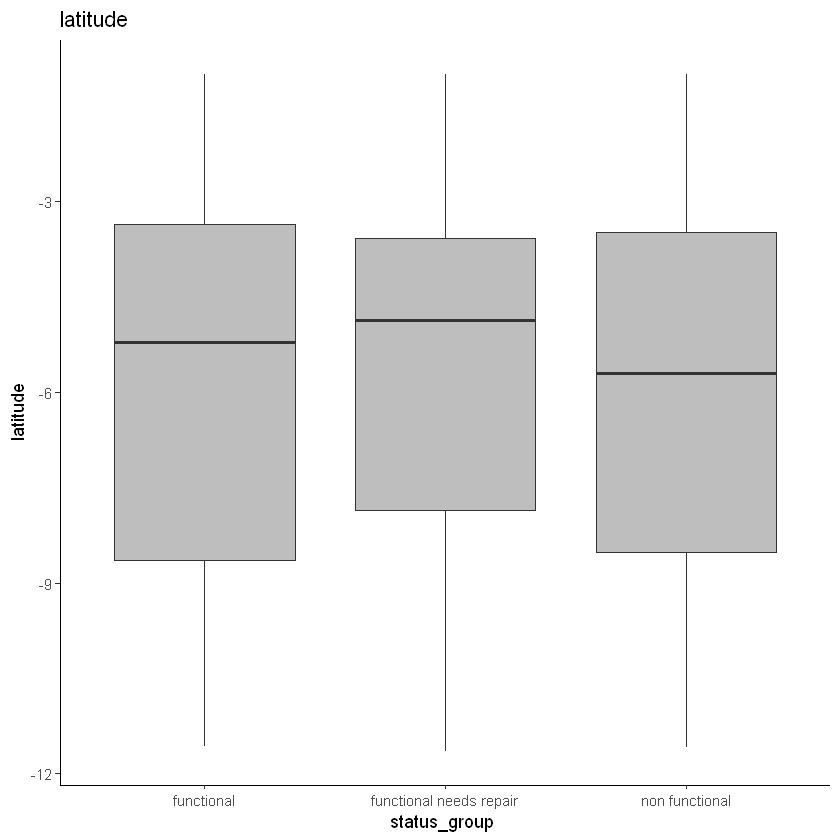

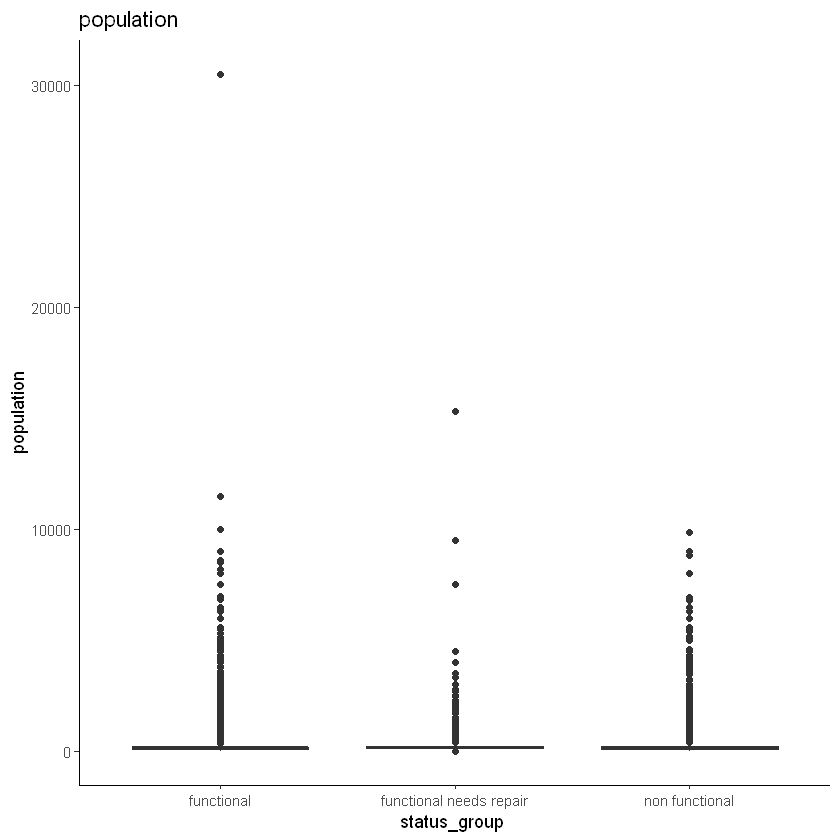

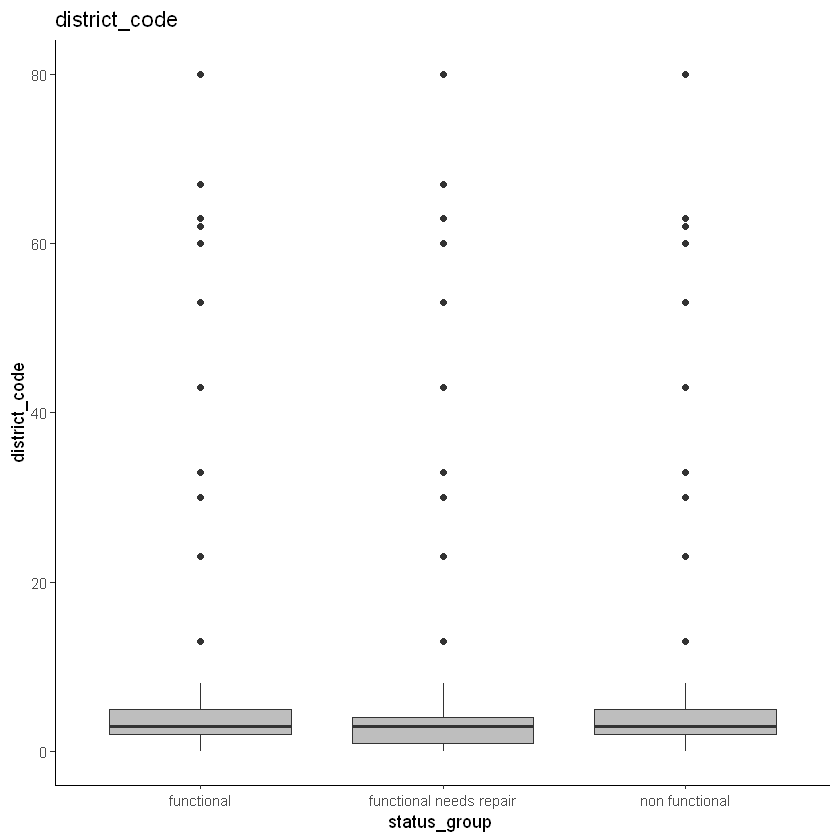

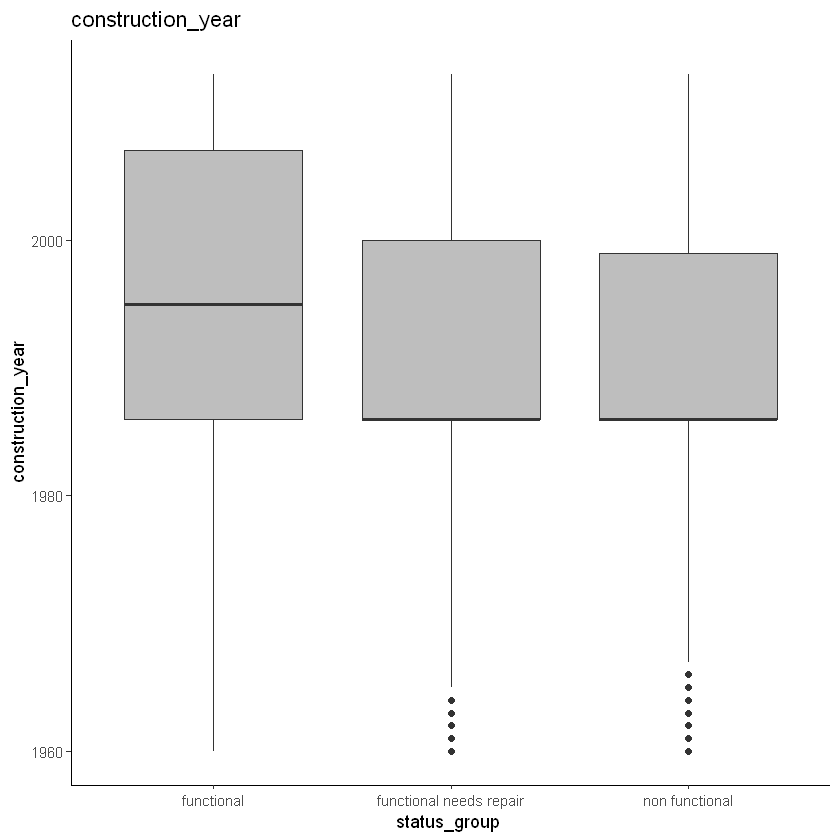

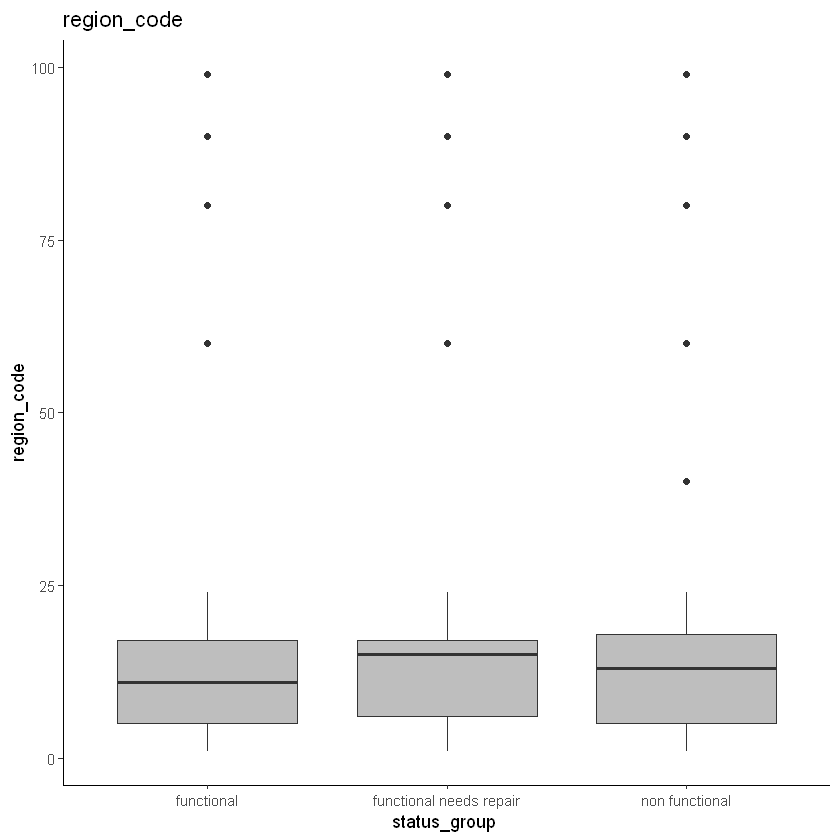

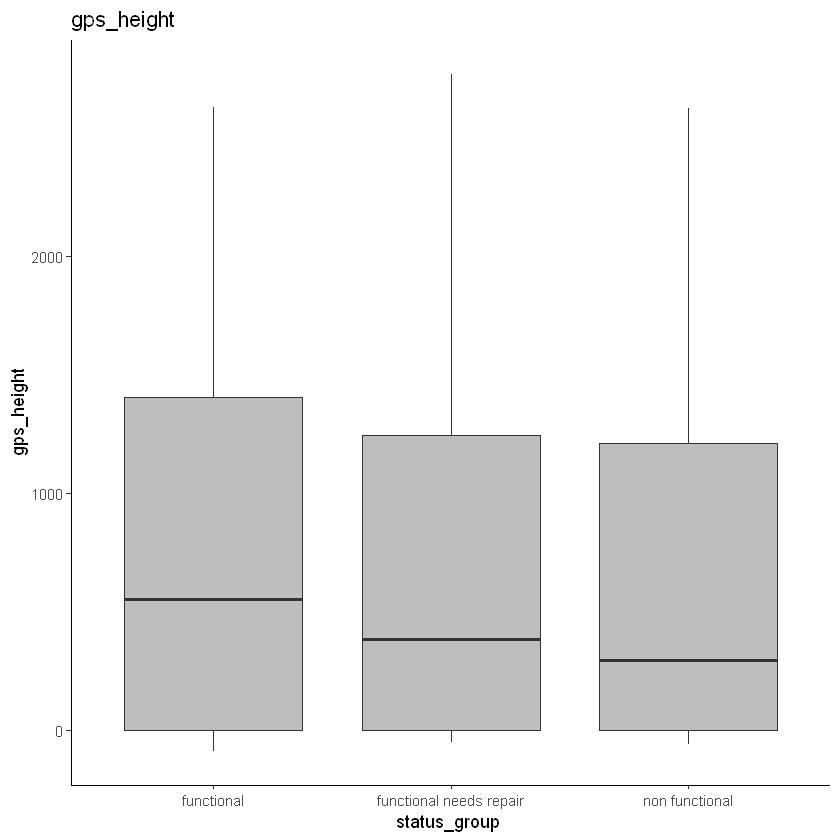

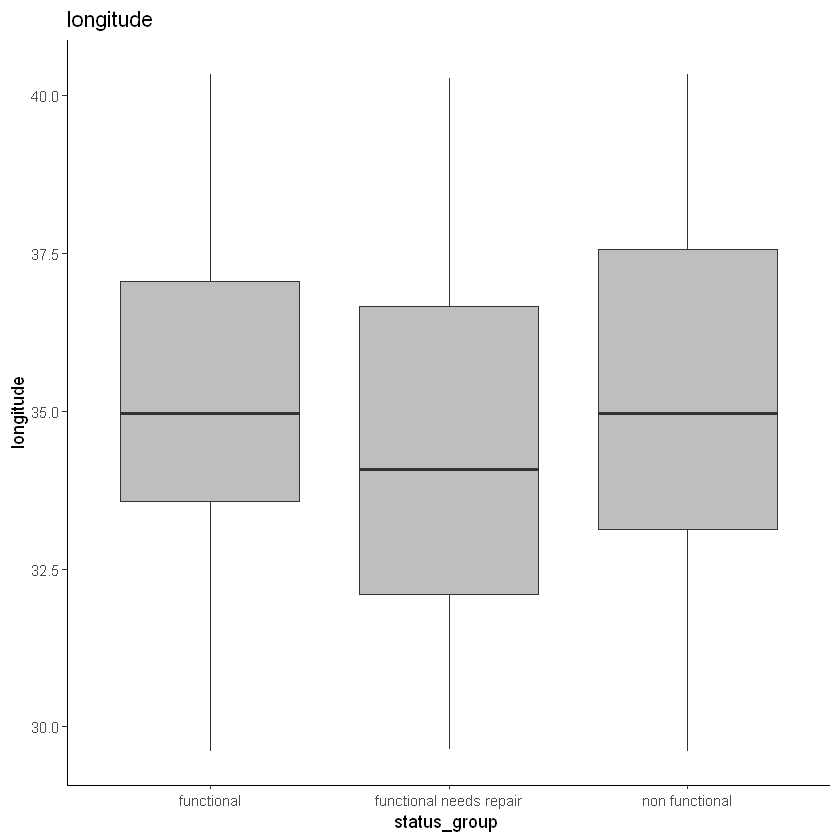

In [11]:
variables_to_keep = c ("amount_tsh", "date_recorded","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year" )
data_keep <- data_raw_df[,variables_to_keep]
data_keep$status_group <- as.factor(training_set_labels$status_group);
data_raw_df_1 <- Remove_irrelevant(data_keep)
data_raw_df_2 <-  Year_recorded (data_raw_df_1)
data_raw_df_3 <- data_cleaning(data_raw_df_2)


#Boxplot for the each numerical categories for each status_group is plot 
df <- data.frame(x = (data_raw_df_3[,"amount_tsh"]), y =data_raw_df_3[,"status_group"] )
df1 <- data.frame(x = (data_raw_df_3[,"date_recorded"]), y =data_raw_df_3[,"status_group"] )
df2 <- data.frame(x = (data_raw_df_3[,"latitude"]), y =data_raw_df_3[,"status_group"] )
df3 <- data.frame(x = (data_raw_df_3[,"population"]), y =data_raw_df_3[,"status_group"] )
df4 <- data.frame(x = (data_raw_df_3[,"district_code"]), y =data_raw_df_3[,"status_group"] )
df5 <- data.frame(x = (data_raw_df_3[,"construction_year"]), y =data_raw_df_3[,"status_group"] )
df6 <- data.frame(x = (data_raw_df_3[,"region_code"]), y =data_raw_df_3[,"status_group"] )
df7 <- data.frame(x = (data_raw_df_3[,"gps_height"]), y =data_raw_df_3[,"status_group"] )
df8 <- data.frame(x = (data_raw_df_3[,"longitude"]), y =data_raw_df_3[,"status_group"] )
par(mfcol = c(3, 3))
ggplot(df, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="amount_tsh",x="status_group ", y = "amount_tsh")+theme_classic()
ggplot(df1, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="date_recorded",x="status_group ", y = "date_recorded")+theme_classic()
ggplot(df2, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="latitude",x="status_group ", y = "latitude")+theme_classic()
ggplot(df3, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="population",x="status_group ", y = "population")+theme_classic()
ggplot(df4, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="district_code",x="status_group ", y = "district_code")+theme_classic()
ggplot(df5, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="construction_year",x="status_group ", y = "construction_year")+theme_classic()
ggplot(df6, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="region_code",x="status_group ", y = "region_code")+theme_classic()
ggplot(df7, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="gps_height",x="status_group ", y = "gps_height")+theme_classic()
ggplot(df8, aes(y, x)) + geom_boxplot(fill="gray")+labs(title="longitude",x="status_group ", y = "longitude")+theme_classic()


## MARIN COMPLETE ICI les explications

In [12]:
variables_to_keep = c("amount_tsh","gps_height","longitude","region_code","district_code", "construction_year" ,"basin","extraction_type_group","waterpoint_type","source","quality_group","payment","management_group","public_meeting")
data_keep <- data_raw_df[,variables_to_keep]
data_keep$status_group <- as.factor(training_set_labels$status_group);
data_raw_df_1 <- Remove_irrelevant(data_keep)
data_raw_df_2 <-  Year_recorded(data_raw_df_1)
data_raw_df_3 <- data_cleaning(data_raw_df_2)
memory <- data_raw_df_3$status_group
data_raw_df_3$status_group <- NULL
data_raw_df_3$date_recorded <- NULL
data_raw_df_3 <- dummy.data.frame(data_raw_df_3, sep="_")
data_raw_df_3$status_group <- as.character(memory)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument 

In [13]:
## Check to ensure no NAs or ""
dim(na.omit(data_raw_df_3))
table(apply(is.na(data_raw_df_3),2,any))
colnames(data_raw_df_3)<- str_replace_all(colnames(data_raw_df_3),c(" " = "_" ))
# Delete unnecessary features that revealed themselves useless when training / and some features that aren't in the test data
data_raw_df_3$management_group_unknown  <- NULL
data_raw_df_3$scheme_management_None  <- NULL
data_raw_df_3$scheme_management_Other  <- NULL
data_raw_df_3$waterpoint_type_dam  <- NULL
data_raw_df_3$extraction_type_group_other  <- NULL
data_raw_df_3$extraction_type_group_other  <- NULL
data_raw_df_3$source_unknown  <- NULL
summary(data_raw_df_3)

##Final data set 

all_cleaned_data <- data_raw_df_3
dim(all_cleaned_data)

[1] 54368    64


FALSE 
   64 

   amount_tsh         gps_height       longitude      region_code  
 Min.   :     0.0   Min.   : -90.0   Min.   :29.61   Min.   : 1.0  
 1st Qu.:     0.0   1st Qu.:   0.0   1st Qu.:33.30   1st Qu.: 5.0  
 Median :     0.0   Median : 365.0   Median :35.01   Median :12.0  
 Mean   :   339.1   Mean   : 667.9   Mean   :35.12   Mean   :15.1  
 3rd Qu.:    30.0   3rd Qu.:1316.0   3rd Qu.:37.20   3rd Qu.:17.0  
 Max.   :350000.0   Max.   :2770.0   Max.   :40.35   Max.   :99.0  
 district_code    construction_year basin_Internal   basin_Lake_Nyasa
 Min.   : 0.000   Min.   :1960      Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 2.000   1st Qu.:1986      1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 3.000   Median :1986      Median :0.0000   Median :0.0000  
 Mean   : 5.734   Mean   :1993      Mean   :0.1288   Mean   :0.0842  
 3rd Qu.: 5.000   3rd Qu.:2004      3rd Qu.:0.0000   3rd Qu.:0.0000  
 Max.   :80.000   Max.   :2013      Max.   :1.0000   Max.   :1.0000  
 basin_Lake_Rukwa  basin_Lake_Tang

[1] 54368    61

# Part 2 : Model selection procedure - Classifier architecture

### We can see this problem as 3 successives binary classifications - One vs One (Pairwise) approach : 
- The first determines whether the waterpoint is 'functional' or 'Non Functional'
- The second determines whether the waterpoint is are 'functional needs repair' or 'functional'
- The third determines whether the waterpoint is are 'functional needs repair' or 'non functional'

"A classifier is trained for each pair of classes,
so there are k(k − 1)/2
independently built binary classifiers. To predict a data point class, the output
of the k(k − 1)/2 classifiers is calculated and a majority vote is considered"  (Bontempi, 2021)

To achieve this: let's train 3 differents models on 3 sub datasets coming from the main one. Each of these dataset contains a given pair of class only, the third one is deleted

In [14]:
## creation of 3 datasets : 1 for each sub classifier
## First data is used to train on 'functional' - 'Non Functional' classification 
## Second data is used to train on 'functional needs repair' or 'functional' classification 
## Third data is used to train on 'functional needs repair' or 'non functional' classification 

first_data <- all_cleaned_data 
first_data <- first_data[-which(first_data$status_group == "functional needs repair"),] 
second_data <- all_cleaned_data
second_data <- second_data[-which(second_data$status_group == "non functional"),]
third_data <- all_cleaned_data
third_data <- third_data[-which(third_data$status_group == "functional"),] 
## see dimensions and target variable distributions of each dataset
dim(all_cleaned_data)
dim(first_data)
dim(second_data)
dim(third_data)
table(first_data[,ncol(first_data)]) 
table(second_data[,ncol(second_data)])
table(third_data[,ncol(third_data)])
## Use of prior distributions to tackle the imbalanced behavior of the dataset
## Prior distributions : for initial data distributions of the target variables for each sub datasets (useful for the DTs)
prior_first <- (table(first_data[,ncol(first_data)])[1])/sum(table(first_data[,ncol(first_data)]))
prior_first <- c(prior_first,1-prior_first)
prior_first #Print the "functional" distribution then the "non functional" distribution percentages
prior_second <- (table(second_data[,ncol(first_data)])[1])/sum(table(second_data[,ncol(second_data)]))
prior_second <- c(prior_second,1-prior_second)
prior_second #Print the "functional" distribution then the "functional needs repair " distribution percentages
prior_third <- (table(third_data[,ncol(first_data)])[1])/sum(table(third_data[,ncol(second_data)]))
prior_third <- c(prior_third,1-prior_third)
prior_third #Print the "functional needs repair" distribution then the "non functional" distribution percentages

[1] 54368    61

[1] 50239    61

[1] 34467    61

[1] 24030    61


    functional non functional 
         30338          19901 


             functional functional needs repair 
                  30338                    4129 


functional needs repair          non functional 
                   4129                   19901 

functional functional 
 0.6038735  0.3961265

functional functional 
 0.8802043  0.1197957

functional needs repair functional needs repair 
              0.1718269               0.8281731

## Training of the 3 models  
## For each subclassifier of the OneVsOne classifier, 3 types of models are trained and compare at each stage

### - First subclassifier : Fvs NF 

In [15]:
set.seed(2) 
idx <- sample(1:nrow(first_data)) 
# re-sample the data to allow a "randomness" in the future test and train sets  
half_split <- floor(nrow(first_data)*0.8) # index to split the dataset in 2 in order to perform a test-train split (80/20)
target_variable <- ncol(first_data) 

train_data <- first_data[idx[1:half_split],]  # Train data split
test_data <- first_data[idx[(half_split+1):nrow(first_data)],] #test data split
dim(test_data) ;dim(train_data)
## model parameters   

hidden_nodes <- 10
n_trees <- 20

[1] 10048    61

[1] 40191    61

In [16]:
set.seed(2)
tic()
## Models training
## For each subclassifier of the OneVsOne classifier, 3 types of models are trained and compare at each stage
first_tree <- rpart(status_group ~ ., method="class",data=train_data, parms = list(prior = prior_first, split = 'gini')) # fitting the data
first_nnet <-nnet(x=train_data[,-target_variable],
               y=class.ind(as.factor(train_data[,target_variable])),
               size=hidden_nodes,
               skip=FALSE,
               trace=T, 
               maxit=1000,
               rang=0.5)
first_rf <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=n_trees, keep.forest=TRUE )
Y.first <- test_data[,target_variable]
Y.hat.first_tree <- predict(first_tree, test_data[,-target_variable])
Y.hat.first_nnet <- predict(first_nnet, test_data[,-target_variable])
Y.hat.first_rf <- predict(first_rf, test_data[,-target_variable])
toc()

# weights:  632
initial  value 20284.667456 
iter  10 value 18568.352900
iter  20 value 18444.144169
iter  30 value 18351.819158
iter  40 value 18210.241628
iter  50 value 18136.538039
iter  60 value 17922.979736
iter  70 value 17903.064126
iter  80 value 17839.469332
iter  90 value 17781.730381
iter 100 value 17735.886895
iter 110 value 17720.294682
iter 120 value 17714.814919
iter 130 value 17713.221884
iter 140 value 17712.572397
final  value 17712.550974 
converged
45.06 sec elapsed


[1] "--------------------------------DT---------------------------"
                Y
Y.hat.predict    functional non functional
  functional           5404           2404
  non functional        600           1640
[1] "accuracy of the DT is : 0.701035031847134"
[1] "Balance Accurarcy Rate of the DT is : 0.725616156983376"
[1] "--------------------------------RF---------------------------"
               functional non functional class.error
functional           5460            544  0.09060626
non functional       1428           2616  0.35311573
[1] " test accuracy from RandomForest :  0.803742038216561"
[1] "--------------------------------NNET---------------------------"
                Y
Y.hat.predict    functional non functional
  functional           5190           3248
  non functional        814            796
[1] "accuracy of the neural net is : 0.595740445859873"
[1] "Balance Accurarcy Rate of the Neural Net is : 0.628870729767362"


Model,Accuracy
DT,0.7010350
RF,0.8037420
NNET,0.5957404


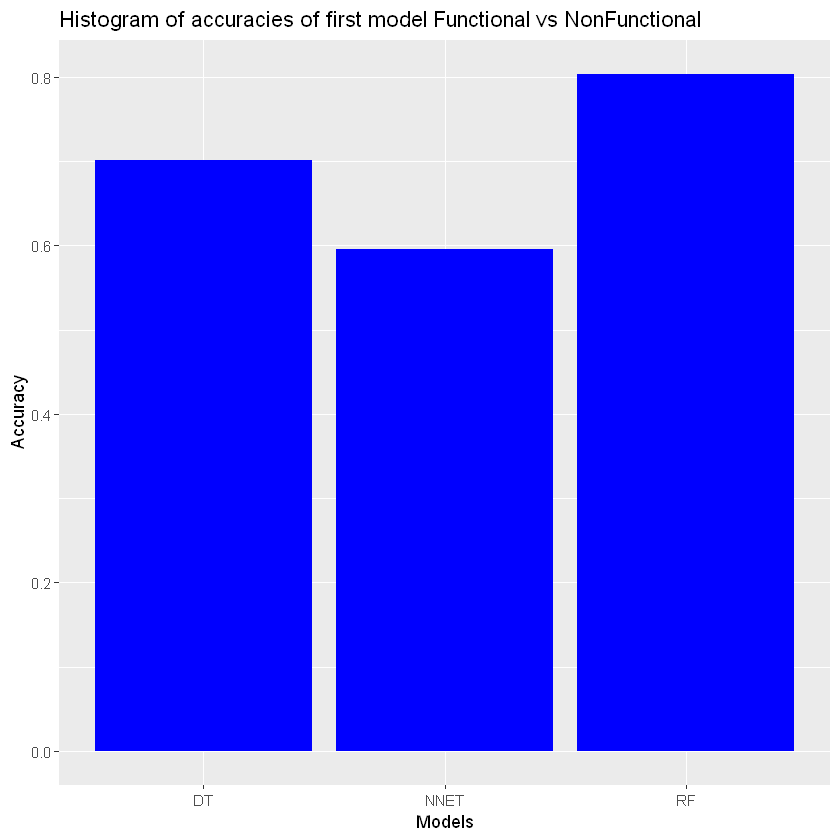

In [17]:
## Compute the accuracy of each model and plot it 
print("--------------------------------DT---------------------------")
acc_DT <- confusion_matrixDT(Y.hat = Y.hat.first_tree, Y = Y.first,threshold = 0.5, pos = "functional", neg = "non functional")
print("--------------------------------RF---------------------------")
print(first_rf$test$confusion)
acc_RF <- accuracyFromConfusionMatrix(first_rf$test$confusion[,1:2])
acc_RF_first <- acc_RF
print(paste(" test accuracy from RandomForest : ",accuracyFromConfusionMatrix(first_rf$test$confusion[,1:2])))
print("--------------------------------NNET---------------------------")
acc_NNET <- confusion_matrixNN(Y.hat = Y.hat.first_nnet, Y = Y.first,threshold = 0.5, pos = "functional", neg = "non functional")
accuracies <- data.frame(Model = c('DT','RF','NNET'),Accuracy = c(acc_DT,acc_RF,acc_NNET))
accuracies
# Plot
ggplot(aes(x=Model,y= Accuracy), data=accuracies, mapping = ) +
    geom_bar(stat='identity',fill = 'blue') +
    ggtitle('Histogram of accuracies of first model Functional vs NonFunctional') +
    xlab('Models') +
    ylab('Accuracy')

### - Second sub classifier : Functional vs FunctionalNeedsRepair 

F vs FNR 

In [18]:
set.seed(2) 
idx <- sample(1:nrow(second_data)) # random sequence of the nb of row of the sample test, to proceed to a
# re-sample the data to allow a "randomness" in the future test and train sets  
half_split <- floor(nrow(second_data)*0.5)# index to split the dataset in 2 in order to perform a test-train split
target_variable <- ncol(second_data) 
train_data <- second_data[idx[1:half_split],]  # Train data split
test_data <- second_data[idx[(half_split+1):nrow(second_data)],] #test data split
## model parameters   

hidden_nodes <- 10
n_trees <- 20

In [19]:
set.seed(2)
tic()
## Models training
second_tree <- rpart(status_group ~ ., method="class",data=train_data,parms = list(prior = c(0.85,0.15), split = 'gini')) # fitting the data
second_nnet <-nnet(x=train_data[,-target_variable],
               y=class.ind(as.factor(train_data[,target_variable])),
               size=hidden_nodes,
               skip=FALSE,
               trace=T, 
               maxit=2000,
               rang=0.5)
second_rf <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=n_trees, keep.forest=TRUE )
## Prediction
Y.hat.second_tree <- predict(second_tree, test_data[,-target_variable])
Y.hat.second_tree <- predict(second_tree, test_data[,-target_variable])
Y.hat.second_nnet <- predict(second_nnet, test_data[,-target_variable])
Y.second <- test_data[,target_variable]
toc()

# weights:  632
initial  value 8264.726841 
final  value 4178.000000 
converged
5 sec elapsed


[1] "--------------------------------DT---------------------------"
                         Y
Y.hat.predict             functional functional needs repair
  functional                   15126                    1886
  functional needs repair         68                     154
[1] "accuracy of the DT is : 0.886619473134502"
[1] "Balance Accurarcy Rate of the DT is : 0.921269360712562"
[1] "--------------------------------RF---------------------------"
[1] " test accuracy from RandomForest :  0.898224440060346"
                        functional functional needs repair class.error
functional                   14975                     219  0.01441358
functional needs repair       1535                     505  0.75245098
[1] "--------------------------------NNET---------------------------"
             Y
Y.hat.predict functional functional needs repair
   functional      15194                    2040
[1] "accuracy of the neural net is : 0.881629337356388"


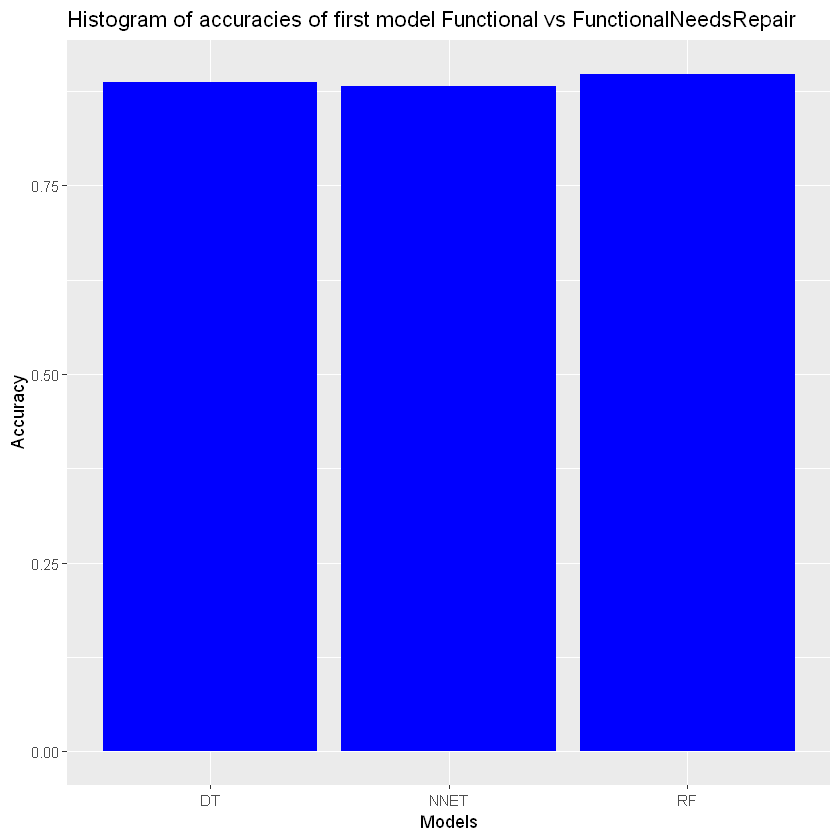

In [20]:
## Compute the accuracy of each model and plot it 
## NNET gives out only "functional", which gives a 'false' good accuracy... only DT and RF predictions can be considered here
print("--------------------------------DT---------------------------")

acc_DT <- confusion_matrixDT(Y.hat = Y.hat.second_tree, Y = Y.second,threshold = 0.5, pos ="functional", neg = "functional needs repair")
print("--------------------------------RF---------------------------")
acc_RF <- accuracyFromConfusionMatrix(second_rf$test$confusion[,1:2])
print(paste(" test accuracy from RandomForest : ",accuracyFromConfusionMatrix(second_rf$test$confusion[,1:2])))
print(second_rf$test$confusion)
acc_RF_second <- acc_RF
print("--------------------------------NNET---------------------------")
acc_NNET <- confusion_matrixNN(Y.hat = Y.hat.second_nnet, Y = Y.second,threshold = 0.5, pos ="functional", neg = "functional needs repair")

accuracies <- data.frame(Model = c('DT','RF','NNET'),Accuracy = c(acc_DT,acc_RF,acc_NNET))
# Plot
ggplot(aes(x=Model,y= Accuracy), data=accuracies, mapping = ) +
    geom_bar(stat='identity',fill = 'blue') +
    ggtitle('Histogram of accuracies of first model Functional vs FunctionalNeedsRepair') +
    xlab('Models') +
    ylab('Accuracy')

## - Third subclassifier : FunctionalNeedsRepair vs NonFunctional 

In [21]:
set.seed(2) 
idx <- sample(1:nrow(third_data)) # random sequence of the nb of row of the sample test, to proceed to a
# re-sample the data to allow a "randomness" in the future test and train sets  
half_split <- floor(nrow(third_data)*0.5)# index to split the dataset in 2 in order to perform a test-train split
target_variable <- ncol(third_data) # the last colonne contains the "y", our targets that will help us to create the mapping m such thay y=m(x)

train_data <- third_data[idx[1:half_split],]  # Train data split
test_data <- third_data[idx[(half_split+1):nrow(third_data)],] #test data split
## model parameters   

hidden_nodes <- 10
n_trees <- 20

In [22]:
set.seed(2)
tic()
## Models training

third_tree <- rpart(status_group ~ ., method="class",data=train_data, parms = list(prior = prior_third,split = "gini")) # fitting the data
third_rf <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=n_trees, keep.forest=TRUE )
third_nnet <-nnet(x=train_data[,-target_variable],
               y=class.ind(as.factor(train_data[,target_variable])),
               size=hidden_nodes,
               skip=F,
               trace=T, 
               maxit=3000,
               rang=0.2)
## Prediction
Y.hat.third_tree <- predict(third_tree, test_data[,-target_variable])
Y.hat.third_nnet <- predict(third_nnet, test_data[,-target_variable])
Y.third <- test_data[,target_variable]
toc()

# weights:  632
initial  value 5767.567654 
final  value 4104.000000 
converged
3.05 sec elapsed


In [23]:
# table(Y.third[,1],ifelse(Y.hat.third_tree[,1] > 0.5,"functional needs repair","non functional"))

Y.third
functional needs repair          non functional 
                   2077                    9938 

[1] "--------------------------------DT---------------------------"
                         Y
Y.hat.predict             functional needs repair non functional
   non functional                             385            168
  functional needs repair                    1692           9770
[1] "accuracy of the DT is : 0.845193508114856"
[1] "Balance Accurarcy Rate of the DT is : 0.874429261130129"
[1] "--------------------------------RF---------------------------"
[1] " test accuracy from RandomForest :  0.873574698293799"
                        functional needs repair non functional class.error
functional needs repair                     905           1172  0.56427540
non functional                              347           9591  0.03491648
[1] "--------------------------------NNET---------------------------"
                         Y
Y.hat.predict             functional needs repair non functional
  functional needs repair                    2077           9938
[1] "accuracy of the

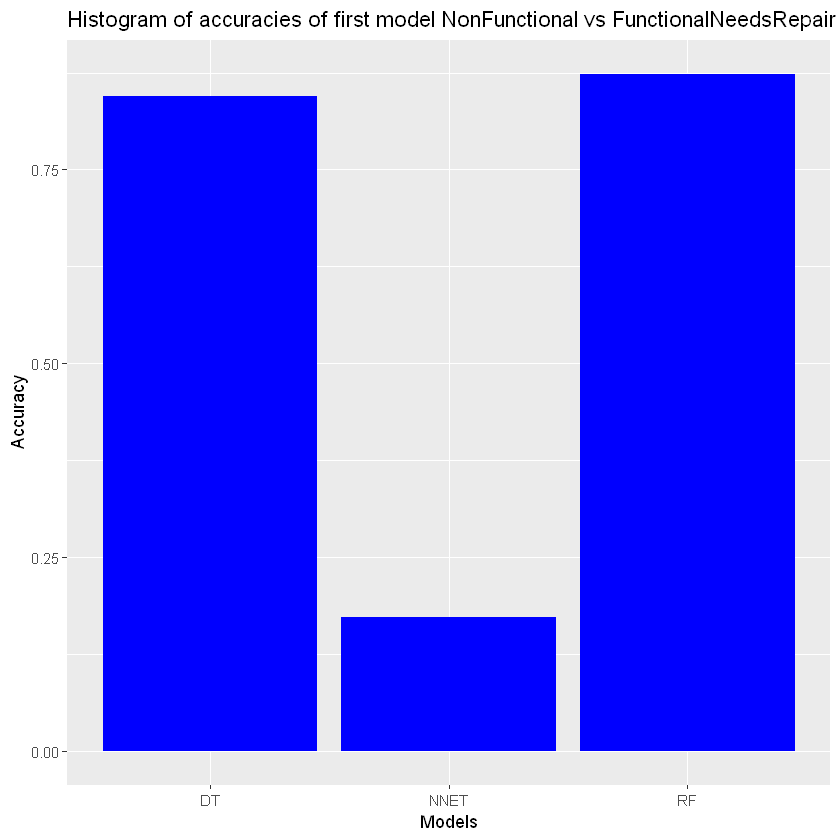

In [24]:
#Compute the accuracy and plot it 
table(Y.third)
print("--------------------------------DT---------------------------")
acc_DT <- confusion_matrixDT(Y.hat = Y.hat.third_tree, Y = Y.third,threshold = 0.5, neg ="functional needs repair", pos = " non functional")
print("--------------------------------RF---------------------------")
acc_RF <-accuracyFromConfusionMatrix(third_rf$test$confusion[,1:2])
print(paste(" test accuracy from RandomForest : ",accuracyFromConfusionMatrix(third_rf$test$confusion[,1:2])))
print(third_rf$test$confusion)
acc_RF_third <- acc_RF
print("--------------------------------NNET---------------------------")
acc_NNET <-confusion_matrixNN(Y.hat = Y.hat.third_nnet, Y = Y.third,threshold = 0.5, neg ="functional needs repair", pos = " non functional")
#  confusion_matrixNN(Y.hat = Y.hat.second_nnet, Y = Y.second,threshold = 0.5, pos ="functional", neg = "functional needs repair")

accuracies <- data.frame(Model = c('DT','RF','NNET'),Accuracy = c(acc_DT,acc_RF,acc_NNET))
# Plot
ggplot(aes(x=Model,y= Accuracy), data=accuracies, mapping = ) +
    geom_bar(stat='identity',fill = 'blue') +
    ggtitle('Histogram of accuracies of first model NonFunctional vs FunctionalNeedsRepair') +
    xlab('Models') +
    ylab('Accuracy')

##### Conclusion from those subclassifier models' accuracies 

- RandomForest performs usually better than every models (as proved in Fernandez-Delgado, 2014), with less False Negative and better robustness towards unbalanced datasets
- Let's compare the performance of a OneVsOne classifier constituted with 3 Random forest vs 3 DT vs 3 NNET

### Multi-class classifier with One vs One approach (Pairwise) : Test on unseen data

#### Same approach as before, but the predictions of each subclassifier are going through a voting system in order to decide the classification of the observation

In [25]:

set.seed(2) 
tic()
idx <- sample(1:nrow(all_cleaned_data)) # random sequence of the nb of row of the sample test, to proceed to a
target_variable <- ncol(all_cleaned_data) # the last colonne contains the "y", our targets that will help us to create the mapping m such thay y=m(x)
#train_data <- first_data[idx[1:half_split],]  # Train data split
test_data <- all_cleaned_data[idx[1:nrow(all_cleaned_data)],] #test data split

##Prediction of each subclassifier for each type of models 
### OvO Decision Tree-based classifier predictions
first_predict_tree <- data.frame(predict(first_tree, test_data[,-target_variable]))
second_predict_tree <- data.frame(predict(second_tree, test_data[,-target_variable]))
third_predict_tree <-  data.frame(predict(third_tree, test_data[,-target_variable]))
### OvO Neural Network-based classifier predictions
first_predict_nnet <- data.frame(predict(first_nnet,test_data[,-target_variable]))
second_predict_nnet <- data.frame(predict(second_nnet, test_data[,-target_variable]))
third_predict_nnet <-  data.frame(predict(third_nnet, test_data[,-target_variable]))
### OvO RandomForest-based classifier predictions
first_predict_rf <- data.frame(predict(first_rf, test_data[,-target_variable]))
second_predict_rf <- data.frame(predict(second_rf, test_data[,-target_variable]))
third_predict_rf <-  data.frame(predict(third_rf, test_data[,-target_variable]))

#Target feature vector as dataframe to keep the labels
Y <- test_data[,target_variable, drop=F]

#Keep the labels stored for further use
nm <- rownames(Y)
rownames(Y) <- nm
## Put the target feature as a matrix for easy matrix computation
Y <- Y[,1]
## Conversion based on threshold for DT and NNET, conversion of levels in character of RF
threshold <-  0.6
first_predict_tree <- ifelse(first_predict_tree[,1] > threshold,"functional", "non functional")
second_predict_tree <- ifelse(second_predict_tree[,2] > threshold,"functional needs repair","functional")
third_predict_tree <- ifelse(third_predict_tree[,2] > threshold,"non functional","functional needs repair")

first_predict_nnet <- ifelse(first_predict_nnet[,1] > threshold,"functional", "non functional")
second_predict_nnet <- ifelse(second_predict_nnet[,2] > threshold,"functional needs repair","functional")
third_predict_nnet <- ifelse(third_predict_nnet[,2] > threshold,"non functional","functional needs repair")

first_predict_rf <- apply(first_predict_rf,2,as.character)
second_predict_rf <- apply(second_predict_rf,2,as.character)
third_predict_rf <- apply(third_predict_rf,2,as.character)
## Store the results and name the columns
Y.hats.tree <- cbind(first_predict_tree,second_predict_tree,third_predict_tree)
Y.hats.nnet <- cbind(first_predict_nnet,second_predict_nnet,third_predict_nnet)
Y.hats.rf <- cbind(first_predict_rf,second_predict_rf,third_predict_rf)
colnames(Y.hats.tree) <- c("FvsNF - Tree", "FvsFNR - Tree", "NFvsFNR - Tree")
colnames(Y.hats.nnet) <- c("FvsNF - NNET", "FvsFNR - NNET", "NFvsFNR - NNET")
colnames(Y.hats.rf) <- c("FvsNF - RF", "FvsFNR - RF", "NFvsFNR - RF")
toc()

1.89 sec elapsed


In [26]:
# install.packages('vote')
# library(vote)
#vote::score(Y.hats.tree,mcan = 3,max.score = 3)

[1] "--------------------------------DT---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  41939                     578                   11851 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   27227                    3107          11605
  functional needs repair        129                     316            133
  non functional                2982                     706           8163

[1] "accuracy of overall DT model in a OvsO approach is : 0.656746615656268"
[1] "--------------------------------NNET---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
    functional non functional 
         20840          33528 

                Y
Y.hat.total      functional functional needs repair non functional
  functional          14892                    1505           4443
  non functional      15446                    2624          15458

[1] "accuracy of overall NNET model in a OvsO approach is : 0.558232783990583"
[1] "--------------------------------RF---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  36759                    1419                   16190 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   28129                    2575           6055
  functional needs repair        243                     948            228
  non functional                1966                     606          13618

[1] "accuracy of overall RF model in a OvsO approach is : 0.785296497939965"


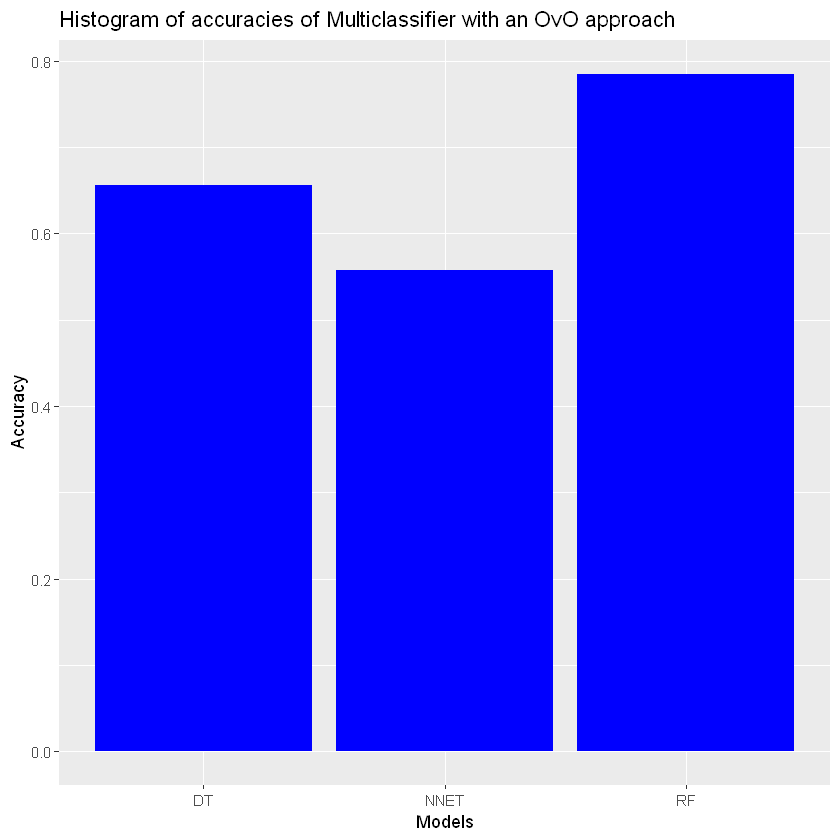

In [27]:
set.seed(2)
##### Compute and show the results 

## DT model accuracy
print("--------------------------------DT---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.tree)) ## Total predictions of the multi classifier
for(i in 1:nrow(Y.hats.tree)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.tree[i,])))
}
table(Y) # Show the target feature distribution
table(Y.hat.total) # Show the prediction distribution
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_DT_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of overall DT model in a OvsO approach is :",acc_DT_model ))
## NNET model accuracy 
print("--------------------------------NNET---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.nnet))
for(i in 1:nrow(Y.hats.nnet)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.nnet[i,])))
}

table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_NNET_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of overall NNET model in a OvsO approach is :",acc_NNET_model ))
## RF model accuracy 
print("--------------------------------RF---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.rf))
for(i in 1:nrow(Y.hats.rf)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.rf[i,])))
}
table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_RF_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of overall RF model in a OvsO approach is :",acc_RF_model ))

##plot 

accuracies <- data.frame(Model = c('DT','RF','NNET'),Accuracy = c(acc_DT_model,acc_RF_model,acc_NNET_model))
# Plot
ggplot(aes(x=Model,y= Accuracy), data=accuracies, mapping = ) +
    geom_bar(stat='identity',fill = 'blue') +
    ggtitle('Histogram of accuracies of Multiclassifier with an OvO approach') +
    xlab('Models') +
    ylab('Accuracy')

##### The RandomForest-based classifier performs better than the NNET and DT-based ones. Let's analyze its performance with a cross validation test 

## Cross validation (NOTE : TAKES SOME TIME) (54minutes)

Ctrl + A to select all then Ctrl + / to uncomment 

In [28]:
# set.seed(2)
# tic()
# k = 10
# target_variable <- ncol(all_cleaned_data)
# accuracy_vec_DT <- array(0,k)
# accuracy_vec_NNET <- array(0,k)
# accuracy_vec_RF <- array(0,k)
# threshold <- 0.5

# idx <- sample(1:nrow(all_cleaned_data))

# # 2. Split the dataset into k groups
# max <- ceiling(nrow(all_cleaned_data)/k)
# splits <- split(idx, ceiling(seq_along(idx)/max))

# # 3. For each unique group:
# for (i in 1:k){
#     #3.1 Take the group as a hold out or test data set
#     test_data <- all_cleaned_data[splits[[i]],]
    
#     #3.2 Take the remaining groups as a training data set
#     train_data <- all_cleaned_data[-splits[[i]],]
#     print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
    
#     #3.3 Train the model
#     first_tree <- rpart(status_group ~ ., method="class",data=train_data) # fitting the data
#     first_nnet <-nnet(x=train_data[,-target_variable],
#                y=class.ind(as.factor(train_data[,target_variable])),
#                size=hidden_nodes,
#                skip=FALSE,
#                trace=T, 
#                maxit=1000,
#                rang=0.5)
#     first_rf <- randomForest(x=train_data[,-c(target_variable)],
#                           y=as.factor(train_data[,c(target_variable)]),
#                           xtest=test_data[,-c(target_variable)],
#                           ytest=as.factor(test_data[,c(target_variable)]),
#                           ntree=n_trees, keep.forest = T)
#     second_tree <- rpart(status_group ~ ., method="class",data=train_data) # fitting the data
    
#     second_nnet <-nnet(x=train_data[,-target_variable],
#                    y=class.ind(as.factor(train_data[,target_variable])),
#                    size=hidden_nodes,
#                    skip=FALSE,
#                    trace=T, 
#                    maxit=2000,
#                    rang=0.5)
#     second_rf <- randomForest(x=train_data[,-c(target_variable)],
#                               y=as.factor(train_data[,c(target_variable)]),
#                               xtest=test_data[,-c(target_variable)],
#                               ytest=as.factor(test_data[,c(target_variable)]),
#                               ntree=n_trees , keep.forest = T) 
#     third_tree <- rpart(status_group ~ ., method="class",data=train_data) # fitting the data
#     third_rf <- randomForest(x=train_data[,-c(target_variable)],
#                               y=as.factor(train_data[,c(target_variable)]),
#                               xtest=test_data[,-c(target_variable)],
#                               ytest=as.factor(test_data[,c(target_variable)]),
#                               ntree=n_trees, keep.forest = T)
#     third_nnet <-nnet(x=train_data[,-target_variable],
#                    y=class.ind(as.factor(train_data[,target_variable])),
#                    size=hidden_nodes,
#                    skip=F,
#                    trace=T, 
#                    maxit=3000,
#                    rang=0.2)
#     #
#     first_predict_tree <- data.frame(predict(first_tree, test_data[,-target_variable]))
#     second_predict_tree <- data.frame(predict(second_tree, test_data[,-target_variable]))
#     third_predict_tree <-  data.frame(predict(third_tree, test_data[,-target_variable]))

#     first_predict_nnet <- data.frame(predict(first_nnet,test_data[,-target_variable]))
#     second_predict_nnet <- data.frame(predict(second_nnet, test_data[,-target_variable]))
#     third_predict_nnet <-  data.frame(predict(third_nnet, test_data[,-target_variable]))

#     first_predict_rf <- data.frame(predict(first_rf, test_data[,-target_variable]))
#     second_predict_rf <- data.frame(predict(second_rf, test_data[,-target_variable]))
#     third_predict_rf <-  data.frame(predict(third_rf, test_data[,-target_variable]))

#     #Target feature vector as dataframe to keep the labels
#     Y <- test_data[,target_variable, drop=F]

#     #Keep the labels stored for further use
#     nm <- rownames(Y)
#     rownames(Y) <- nm
#     ## Put the target feature as a matrix for easy matrix computation
#     Y <- Y[,1]
#     ## Conversion based on threshold for DT and NNET, conversion of levels in character of RF
#     threshold <-  0.6
#     first_predict_tree <- ifelse(first_predict_tree[,1] > threshold,"functional", "non functional")
#     second_predict_tree <- ifelse(second_predict_tree[,2] > threshold,"functional needs repair","functional")
#     third_predict_tree <- ifelse(third_predict_tree[,2] > threshold,"non functional","functional needs repair")

#     first_predict_nnet <- ifelse(first_predict_nnet[,1] > threshold,"functional", "non functional")
#     second_predict_nnet <- ifelse(second_predict_nnet[,2] > threshold,"functional needs repair","functional")
#     third_predict_nnet <- ifelse(third_predict_nnet[,2] > threshold,"non functional","functional needs repair")

#     first_predict_rf <- apply(first_predict_rf,2,as.character)
#     second_predict_rf <- apply(second_predict_rf,2,as.character)
#     third_predict_rf <- apply(third_predict_rf,2,as.character)
#     ## Store
#     Y.hats.tree <- cbind(first_predict_tree,second_predict_tree,third_predict_tree)
#     Y.hats.nnet <- cbind(first_predict_nnet,second_predict_nnet,third_predict_nnet)
#     Y.hats.rf <- cbind(first_predict_rf,second_predict_rf,third_predict_rf)
# #     colnames(Y.hats.tree) <- c("FvsNF - Tree", "FvsFNR - Tree", "NFvsFNR - Tree")
# #     colnames(Y.hats.nnet) <- c("FvsNF - NNET", "FvsFNR - NNET", "NFvsFNR - NNET")
# #     colnames(Y.hats.rf) <- c("FvsNF - RF", "FvsFNR - RF", "NFvsFNR - RF")

#     ## DT model accuracy
#     print("--------------------------------DT---------------------------")
#     Y.hat.total <- array(0,nrow(Y.hats.tree))
#     for(j in 1:nrow(Y.hats.tree)){
#         Y.hat.total[j] <- names(which.max(table(Y.hats.tree[j,])))
#     }
#     # Y.hat.total <- apply(Y.hats,1,names)
#     table(Y)
#     table(Y.hat.total)
#     confusion_matrix <- table(Y.hat.total,Y)
#     confusion_matrix
#     acc_DT_model <- accuracyFromConfusionMatrix(confusion_matrix)
#     print(paste("accuracy of overall DT model in a OvsO approach is :",acc_DT_model ))
#     ## NNET model accuracy 
#     print("--------------------------------NNET---------------------------")
#     Y.hat.total <- array(0,nrow(Y.hats.nnet))
#     for(j in 1:nrow(Y.hats.nnet)){
#         Y.hat.total[j] <- names(which.max(table(Y.hats.nnet[j,])))
#     }
#     # Y.hat.total <- apply(Y.hats,1,names)
#     table(Y)
#     table(Y.hat.total)
#     confusion_matrix <- table(Y.hat.total,Y)
#     confusion_matrix
#     acc_NNET_model <- accuracyFromConfusionMatrix(confusion_matrix)
#     print(paste("accuracy of overall NNET model in a OvsO approach is :",acc_NNET_model ))
#     ## RF model accuracy 
#     print("--------------------------------RF---------------------------")
#     Y.hat.total <- array(0,nrow(Y.hats.rf))
#     for(j in 1:nrow(Y.hats.rf)){
#         Y.hat.total[j] <- names(which.max(table(Y.hats.rf[j,])))
#     }
#     # Y.hat.total <- apply(Y.hats,1,names)
#     table(Y)
#     table(Y.hat.total)
#     confusion_matrix <- table(Y.hat.total,Y)
#     confusion_matrix
#     acc_RF_model <- accuracyFromConfusionMatrix(confusion_matrix)
#     print(paste("accuracy of overall RF model in a OvsO approach is :",acc_RF_model ))

#     #3.5 Retain the evaluation score and discard the model
#     accuracy_vec_DT[i] <- acc_DT_model 
#     accuracy_vec_NNET[i] <- acc_NNET_model 
#     accuracy_vec_RF[i] <- acc_RF_model 
#     print(paste("[INFO] - DT accuracy rate -",accuracy_vec_DT[i],"fold:",i))
#     print(paste("[INFO] - NNET accuracy rate -",accuracy_vec_NNET[i],"fold:",i))
#     print(paste("[INFO] - RF accuracy rate -",accuracy_vec_RF[i],"fold:",i))
# }
# accuracies <- data.frame(Model = c('DT','RF','NNET'),Accuracy = c(acc_DT_model,acc_RF_model,acc_NNET_model))
# #4. Summarize the skill of the model using the sample of model evaluation scores
# print(paste("[INFO] - Mean DT accuracy rate:",mean(accuracy_vec_DT)))
# print(paste("[INFO] - Mean NNET accuracy rate:",mean(accuracy_vec_NNET)))
# print(paste("[INFO] - Mean RF accuracy rate:",mean(accuracy_vec_RF)))
# # Plot
# ggplot(aes(x=Model,y= Accuracy), data=accuracies) +
#     geom_bar(stat='identity',fill = 'blue') +
#     ggtitle('Histogram of CV accuracies of Multiclassifier with an OvO approach') +
#     xlab('Models') +
#     ylab('Accuracy')
# toc()

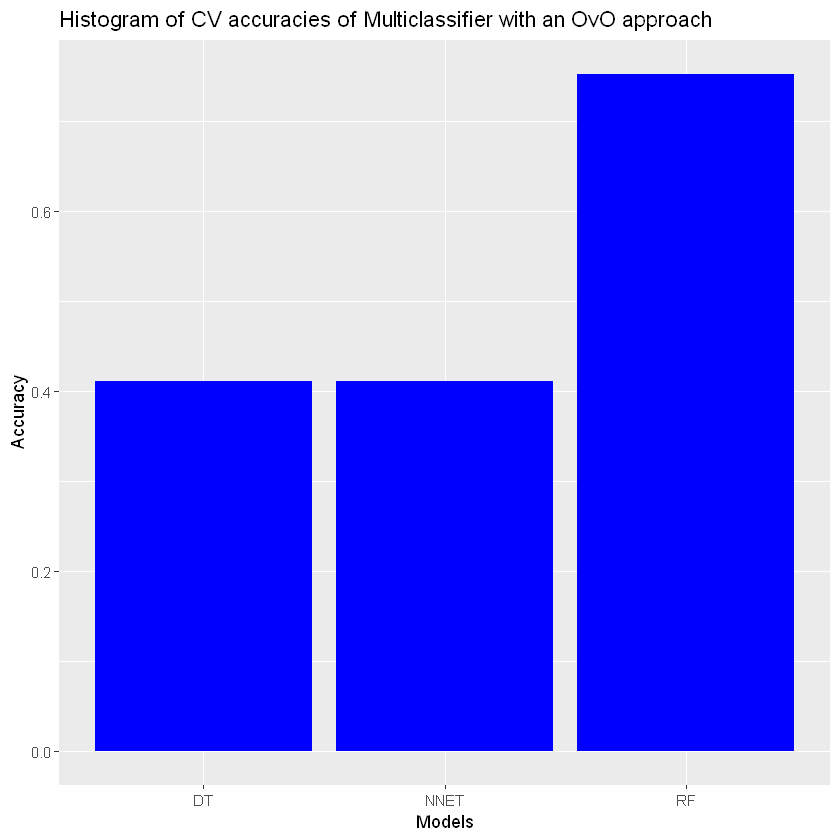

In [29]:
display_png(file="cross_validation_results.png")

##### Here the RandomForest-based OneVsOne classifier distinguishes itself by a mean CV accuracy more consistent with the previous accuracuy on the test set (74.86% on CV against 78.5% on the test set)

##  Part 3 : Alternative models - Comparison with previous models and classifier


By looking at previous subclassifiers, we can see that the one doing the "Functional" vs "NonFunctional" is not performing as good as the 2 others subclassifiers (from 70% to 79% vs 85-89% of accuracy)
This can be seen also through the proportion of this classifier on the misclassification rate : 


In [30]:
missclassification_rate_OvO_classifier <- 1- acc_RF_model
missclassification_first_subclassifier <- 1 - acc_RF_first
missclassification_first_subclassifier/missclassification_rate_OvO_classifier

[1] 0.9140883

To improve the accuracy of the OvO classifier, it would then be more effective to improve the first subclassifier

Let's compare this classifier with another classifier built with other libraries and learning procedures : 

- With the caret package, let's train a Gradient Boosting Machines, a SVM with Radial Basis Function Kernel and a Linear Discriminant Analysis model


In [31]:
#Create train-test splits to train the first subclassifier of the OvsOne classifier

set.seed(2) 

idx <- sample(1:nrow(first_data)) 
half_split <- floor(nrow(first_data)*0.8) 
target_variable <- ncol(first_data) 
train_data_1 <- first_data[idx[1:half_split],]  # Train data split
test_data_1 <- first_data[idx[(half_split+1):nrow(first_data)],] #test data split

dim(train_data_1)

#second
idx <- sample(1:nrow(second_data)) 
half_split <- floor(nrow(second_data)*0.8) 
target_variable <- ncol(second_data) 
train_data_2 <- second_data[idx[1:half_split],]  # Train data split
test_data_2 <- second_data[idx[(half_split+1):nrow(second_data)],] #test data split
dim(train_data_2)
#third
idx <- sample(1:nrow(third_data)) # random sequence of the nb of row of the sample test, to proceed to a
# re-sample the data to allow a "randomness" in the future test and train sets  
half_split <- floor(nrow(third_data)*0.8)# index to split the dataset in 2 in order to perform a test-train split
target_variable <- ncol(third_data) # the last colonne contains the "y", our targets that will help us to create the mapping m such thay y=m(x)

train_data_3 <- third_data[idx[1:half_split],]  # Train data split
test_data_3 <- third_data[idx[(half_split+1):nrow(third_data)],] #test data split
dim(train_data_3)
## model tuning parameters   
Y_factor <- as.factor(test_data_1$status_group)

[1] 40191    61

[1] 27573    61

[1] 19224    61

In [32]:
load("best_models_from_caret_analysis_2.Rdata") ## Load the models developed in the next cells. 
#Those took some time to be trained and to avoid errors or too long training times, we load them here and print the results and figures

### DON'T RUN the below commented code unless you need to verify our process ! TAKES A LOT OF TIME 
TO RUN : Ctrl + a to select all then Ctrl + / to uncomment

[PROFESSORS] : PLEASE TAKES THIS INTO ACCOUNT : H2o.init() launches an error if you don't have the earliest version of JAVA, but this error doesn't stop you from running the following lines of code. Rerun the library(h2o) lines after and the library will still be loaded.

In [33]:
# library(h2o)
# h2o.init()

In [34]:
# #Control parameters of the train. 2 folds for the crossvalidation is rather small but the team was short on computational ressources
# control=trainControl(method="cv",number=2, allowParallel=TRUE, verboseIter=TRUE)  #Control parameters to perform a 10-fold cross validation 

In [35]:
# tic()
# model_svm <- train(status_group ~ .,data=train_data_1, method='svmRadialCost',trControl = control) 
# model_lda <- train(status_group ~ .,data=train_data_1, method='lda2',trControl = control )
# model_gbm <- train(status_group ~ .,data=train_data_1, method='gbm',trControl = control )
# model_rf <- train(status_group ~ .,data=train_data_1, method='ranger',trControl = control )
# toc()


In [36]:
# load("best_model_rf.Rdata") #the above computed models will be loaded with the following lines

In [37]:
# #Put reference as factor
# Y_factor <- as.factor(test_data_1$status_group)
# #Compute predictions
# pred_svm <- predict(model_svm,test_data_1[,-target_variable])
# pred_lda <- predict(model_lda,test_data_1[,-target_variable])
# pred_gbm <- predict(model_gbm,test_data_1[,-target_variable])
# pred_rf <- predict(model_rf,test_data_1[,-target_variable])
# # pred_crf <- predict(model_crf,test_data_1[,-target_variable])
# # pred_randrf <- predict(model_randrf,test_data_1[,-target_variable])
# #Compute ConfusionMatrix
# confusionMatrix_svm <- confusionMatrix(pred_svm,Y_factor)
# confusionMatrix_lda <- confusionMatrix(pred_lda,Y_factor)
# confusionMatrix_gbm <- confusionMatrix(pred_gbm,Y_factor)
# confusionMatrix_rf <- confusionMatrix(pred_rf,Y_factor)
# # confusionMatrix_crf <- confusionMatrix(pred_crf,Y_factor)
# # confusionMatrix_randrf <- confusionMatrix(pred_randrf,Y_factor)
# ## Display the results 
# model_comparison <- data.frame(Model = c('SVM',
#                                       'Linear Discriminant','Stochastic Gradient Boosting ','RF Ranger','RF RandomForest'),
#                             Accuracy = c(confusionMatrix_svm$overall[1],
#                                          confusionMatrix_lda$overall[1],
#                                         confusionMatrix_gbm$overall[1],
#                                          confusionMatrix_rf$overall[1],acc_RF_first))

# ggplot(aes(x=Model, y=Accuracy), data=model_comparison) +
#     geom_bar(stat='identity', fill = 'blue') +
#     ggtitle('Comparison of Models Accuracy on Test Data - Functional vs Non Functional sub classifier') +
#     xlab('Models') +
#     ylab('Overall Accuracy')

# print('-------------------Accuracies---------------------')
# print(paste("Accuracy of the SVM model : ",confusionMatrix_svm$overall[1] ))
# print(paste("Accuracy of Gradient Boosting Machines model : ",confusionMatrix_gbm$overall[1]))
# print(paste("Accuracy of RandomForest (ranger) model : ",confusionMatrix_rf$overall[1] ))
# print(paste("Accuracy of RandomForest (ranger) model : ",confusionMatrix_rf$overall[1], "vs Accuracy of RandomForest (RandomForest)",acc_RF_first))

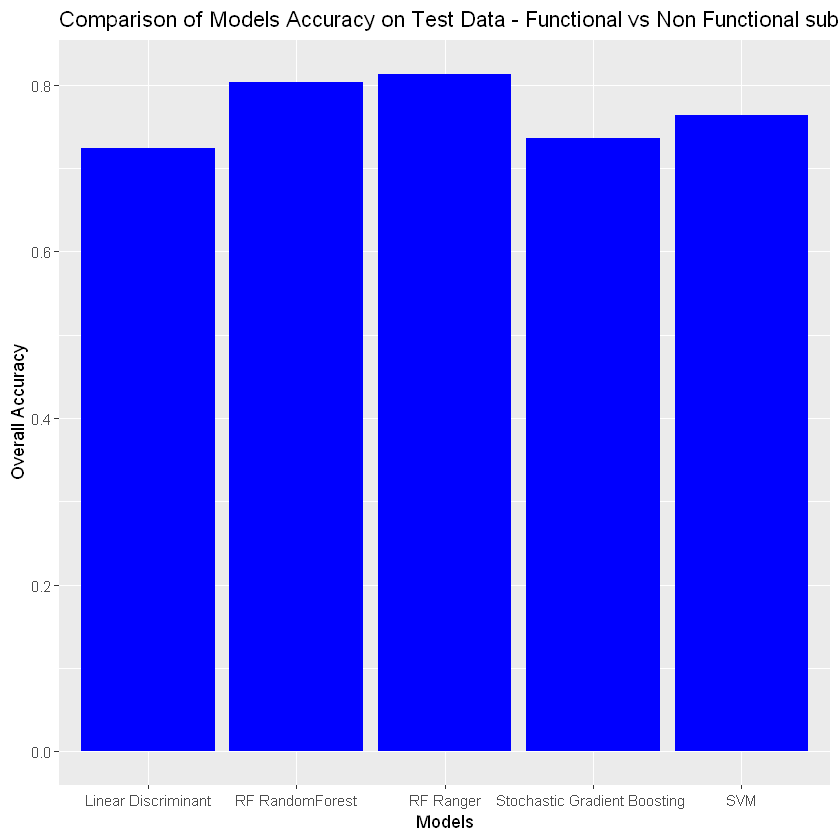

In [38]:
display_png(file="Models comparison - first.png")

We can see that Random Forest from the ranger package (best than RandomForest on high dimensional data (Wright, M. N. & Ziegler, A. (2017)) performs better on the First classification task. Let's add this model as first classifier of the OneVsOne classifier

##### Let's do the same procedure for the 2 others subclassifiers
Second Subclassifier : "Functional Needs Repair" vs "Non Functional"

In [39]:
# ## Train 
# tic()
# model_svm_2 <- train(status_group ~ .,data=train_data_2, method='svmRadialCost',trControl = control) 
# model_lda_2 <- train(status_group ~ .,data=train_data_2, method='lda2',trControl = control )
# model_gbm_2 <- train(status_group ~ .,data=train_data_2, method='gbm',trControl = control )
# model_rf_2 <- train(status_group ~ .,data=train_data_2, method='ranger',trControl = control )
# #Put reference as factor
# Y_factor <- as.factor(test_data_2$status_group)
# #Compute predictions
# pred_svm <- predict(model_svm_2,test_data_2[,-target_variable])
# pred_lda <- predict(model_lda_2,test_data_2[,-target_variable])
# pred_gbm <- predict(model_gbm_2,test_data_2[,-target_variable])
# pred_rf <- predict(model_rf_2,test_data_2[,-target_variable])
# #Compute ConfusionMatrix
# confusionMatrix_svm <- confusionMatrix(pred_svm,Y_factor)
# confusionMatrix_lda <- confusionMatrix(pred_lda,Y_factor)
# confusionMatrix_gbm <- confusionMatrix(pred_gbm,Y_factor)
# confusionMatrix_rf <- confusionMatrix(pred_rf,Y_factor)
# # confusionMatrix_crf <- confusionMatrix(pred_crf,Y_factor)
# # confusionMatrix_randrf <- confusionMatrix(pred_randrf,Y_factor)
# ## Display the results 
# model_comparison <- data.frame(Model = c('SVM',
#                                       'Linear Discriminant','Stochastic Gradient Boosting ','RF Ranger','RF RandomForest'),
#                             Accuracy = c(confusionMatrix_svm$overall[1],
#                                          confusionMatrix_lda$overall[1],
#                                         confusionMatrix_gbm$overall[1],
#                                          confusionMatrix_rf$overall[1],acc_RF_second))

# ggplot(aes(x=Model, y=Accuracy), data=model_comparison) +
#     geom_bar(stat='identity', fill = 'blue') +
#     ggtitle('Comparison of Models Accuracy on Test Data - "Functional Needs Repair" vs "Non Functional"') +
#     xlab('Models') +
#     ylab('Overall Accuracy')
# print('-------------------Accuracies---------------------')
# print(paste("Accuracy of the SVM model : ",confusionMatrix_svm$overall[1] ))
# print(paste("Accuracy of Gradient Boosting Machines model : ",confusionMatrix_gbm$overall[1]))
# print(paste("Accuracy of RandomForest (ranger) model : ",confusionMatrix_rf$overall[1] ))
# print(paste("Accuracy of RandomForest (ranger) model : ",confusionMatrix_rf$overall[1], "vs Accuracy of RandomForest (RandomForest)",acc_RF_second))
# toc()

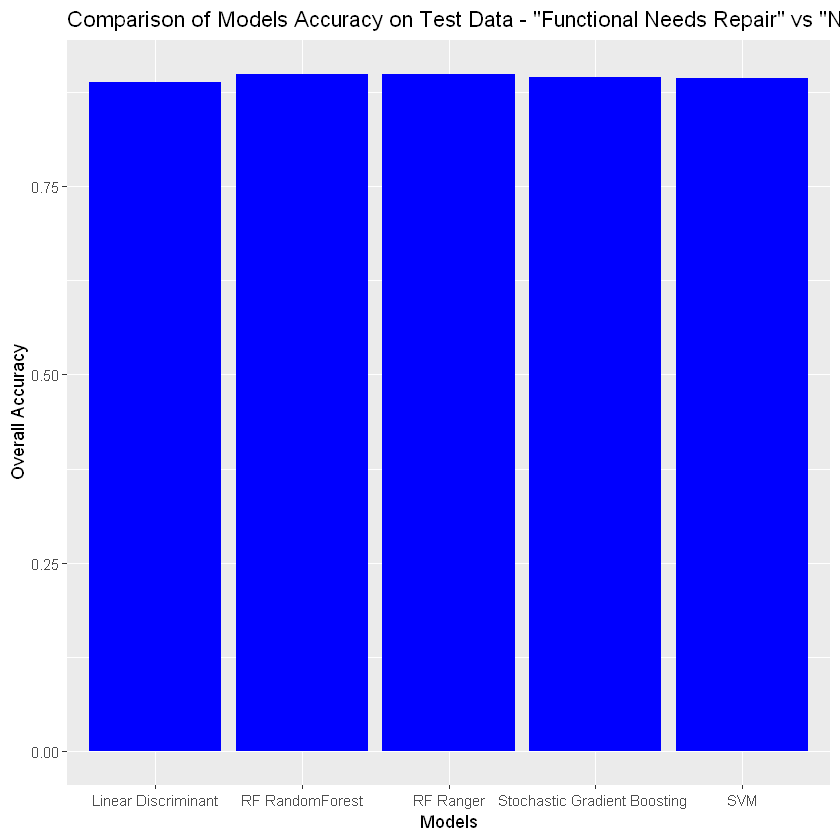

In [40]:
display_png(file="Models comparison - second.png")

For the second subclassifier, the RandomForest model (Ranger) performs better than the RandomForest model from the  package 'RandomForest'.  

Third subclassifier  : "Functional Needs repair" vs "Non Fonctional"

Note : LDA has been put aside for this last classifier

In [41]:
# ## Train 
# tic()
# model_svm_3 <- train(status_group ~ .,data=train_data_3, method='svmRadialCost',trControl = control,metric ='Accuracy') 
# model_gbm_3 <- train(status_group ~ .,data=train_data_3, method='gbm',trControl = control,metric ='Accuracy' )
# model_rf_3 <- train(status_group ~ .,data=train_data_3, method='ranger',trControl = control ,metric ='Accuracy')
# #Put reference as factor
# Y_factor <- as.factor(test_data_3$status_group)
# #Compute predictions
# pred_svm <- predict(model_svm_3,test_data_3[,-target_variable])
# pred_gbm <- predict(model_gbm_3,test_data_3[,-target_variable])
# pred_rf <- predict(model_rf_3,test_data_3[,-target_variable])
# #Compute ConfusionMatrix
# confusionMatrix_svm <- confusionMatrix(pred_svm,Y_factor)
# confusionMatrix_gbm <- confusionMatrix(pred_gbm,Y_factor)
# confusionMatrix_rf <- confusionMatrix(pred_rf,Y_factor)
# # confusionMatrix_crf <- confusionMatrix(pred_crf,Y_factor)
# # confusionMatrix_randrf <- confusionMatrix(pred_randrf,Y_factor)
# ## Display the results 
# model_comparison <- data.frame(Model = c('SVM',
#                                       'Stochastic Gradient Boosting ','RF Ranger','RF RandomForest'),
#                             Accuracy = c(confusionMatrix_svm$overall[1],
#                                         confusionMatrix_gbm$overall[1],
#                                          confusionMatrix_rf$overall[1],acc_RF_third))

# ggplot(aes(x=Model, y=Accuracy), data=model_comparison) +
#     geom_bar(stat='identity', fill = 'blue') +
#     ggtitle('Comparison of Models Accuracy on Test Data - "Functional Needs repair" vs "Non Fonctional"') +
#     xlab('Models') +
#     ylab('Overall Accuracy')
# print('-------------------Accuracies---------------------')
# print(paste("Accuracy of the SVM model : ",confusionMatrix_svm$overall[1] ))
# print(paste("Accuracy of Gradient Boosting Machines model : ",confusionMatrix_gbm$overall[1]))
# print(paste("Accuracy of RandomForest (ranger) model : ",confusionMatrix_rf$overall[1] ))
# print(paste("Accuracy of RandomForest (ranger) model : ",confusionMatrix_rf$overall[1], "vs Accuracy of RandomForest (RandomForest)",acc_RF_third))
# toc()

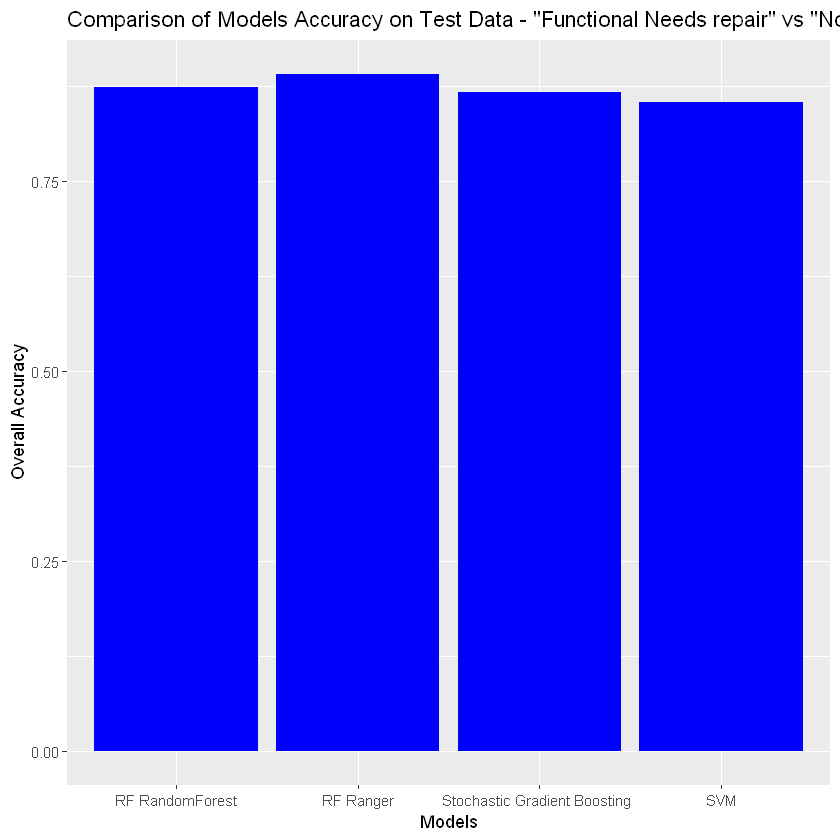

In [42]:
display_png(file="Models comparison - third.png")

Here For the third subclassifier, the RandomForest model (Ranger) performs slightly better than the RandomForest model from the package 'RandomForest'.  

## One Vs One Classifier with alternative subclassifiers - Comparison with the previous one

For the sake of compleness, 4 other classifiers were produced : 
- (SVM with Radial Basis Function cost, RandomForest, RandomForest)
- (Stochastic Gradient Boosting, RandomForest, RF Ranger)
- (LDA, RandomForest, SVM with Radial Basis Function cost)

The 'best' classifier  is ,based on the previous computations, the classifier constituted with each model that came best for each subclassifier : 
- (Ranger, RandomForest, Ranger)

[1] "--------------------------------OvO with 3 RandomForest---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  36738                    1417                   16213 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   28106                    2572           6060
  functional needs repair        240                     949            228
  non functional                1992                     608          13613

[1] "accuracy of the classifier in a OvsO approach is : 0.784799882283696"
[1] "--------------------------------OvO with 1 Ranger and 2 RandomForest---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  33778                    1417                   19173 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   29016                    2443           2319
  functional needs repair        240                     949            228
  non functional                1082                     737          17354

[1] "accuracy of the classifier in a OvsO approach is : 0.870346527369041"
[1] "--------------------------------OvO with SVM, RandomForest, RandomForest---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  33778                    1417                   19173 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   29016                    2443           2319
  functional needs repair        240                     949            228
  non functional                1082                     737          17354

[1] "accuracy of the classifier in a OvsO approach is : 0.870346527369041"
[1] "--------------------------------OvO with Stochastic Gradient Boosting, RandomForest, RF Ranger---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  40087                    1495                   12786 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   27375                    2859           9853
  functional needs repair        253                    1153             89
  non functional                2710                     117           9959

[1] "accuracy of the classifier in a OvsO approach is : 0.707898028251913"
[1] "--------------------------------OvO with LDA, RandomForest, SVM with Radial Basis Function cost---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  40274                     738                   13356 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   26989                    2875          10410
  functional needs repair        141                     478            119
  non functional                3208                     776           9372

[1] "accuracy of the classifier in a OvsO approach is : 0.677586080047087"
[1] "--------------------------------OvO with Ranger+RF+Ranger ---------------------------"


Y
             functional functional needs repair          non functional 
                  30338                    4129                   19901 

Y.hat.total
             functional functional needs repair          non functional 
                  33967                    1495                   18906 

                         Y
Y.hat.total               functional functional needs repair non functional
  functional                   29022                    2719           2226
  functional needs repair        253                    1153             89
  non functional                1063                     257          17586

[1] "accuracy of the classifier in a OvsO approach is : 0.878476309593879"
64.88 sec elapsed


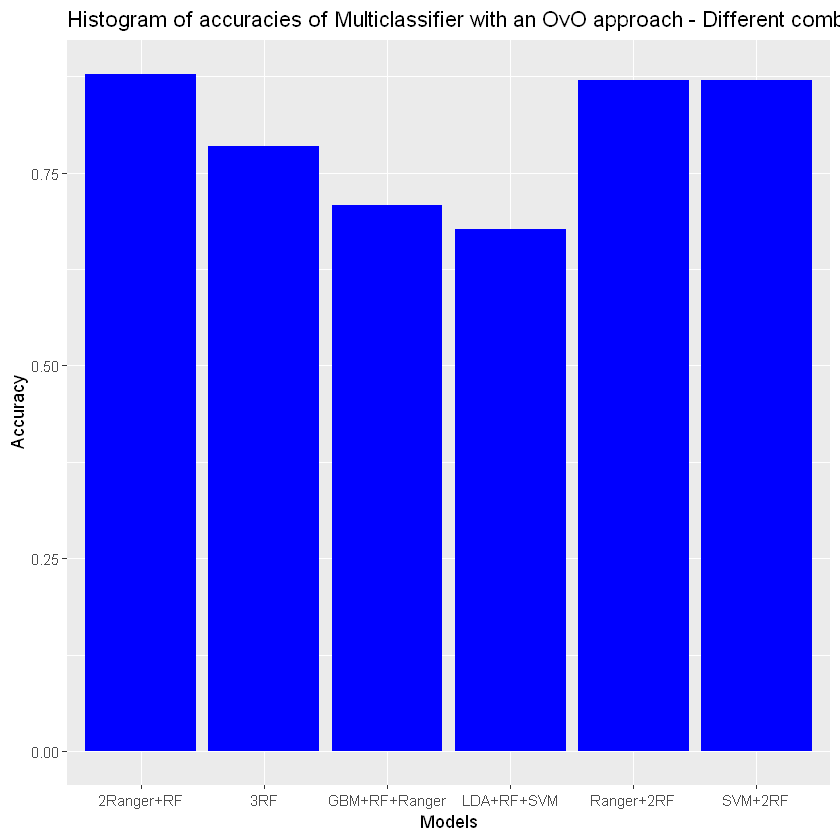

In [43]:
tic()
set.seed(2) 
idx <- sample(1:nrow(all_cleaned_data)) # random sequence of the nb of row of the sample test, to proceed to a
target_variable <- ncol(all_cleaned_data) # the last colonne contains the "y", our targets that will help us to create the mapping m such thay y=m(x)
#train_data <- first_data[idx[1:half_split],]  # Train data split
test_data <- all_cleaned_data[idx[1:nrow(all_cleaned_data)],] #test data split

##Prediction of each subclassifier for each type of models 

### OvO RandomForest-based classifier predictions
first_predict_ranger <- data.frame(predict(model_rf, test_data[,-target_variable])) ### New firstsubclassifier
first_predict_rf <- data.frame(predict(first_rf, test_data[,-target_variable]))
second_predict_rf <- data.frame(predict(second_rf, test_data[,-target_variable]))
third_predict_rf <-  data.frame(predict(third_rf, test_data[,-target_variable]))

### Second combination 
first_predict_svm <- data.frame(predict(model_rf, test_data[,-target_variable])) ### 
### Third combination
first_predict_gbm <- data.frame(predict(model_gbm, test_data[,-target_variable])) ### 
third_predict_ranger <- data.frame(predict(model_rf_3, test_data[,-target_variable])) ### 
### Fourth combination
first_predict_lda <- data.frame(predict(model_lda, test_data[,-target_variable])) ### New firstsubclassifier
third_predict_svm <- data.frame(predict(model_svm_3, test_data[,-target_variable])) ### 


#Target feature vector as dataframe to keep the labels
Y <- test_data[,target_variable, drop=F]

#Keep the labels stored for further use
nm <- rownames(Y)
rownames(Y) <- nm
## Put the target feature as a matrix for easy matrix computation
Y <- Y[,1]
## Conversion based on threshold for DT and NNET, conversion of levels in character of RF
### Prediction of the initial and first combination
first_predict_ranger <- apply(first_predict_ranger,2,as.character) ### New firstsubclassifier
first_predict_rf <- apply(first_predict_rf,2,as.character)
second_predict_rf <- apply(second_predict_rf,2,as.character)
third_predict_rf <- apply(third_predict_rf,2,as.character)
##Second combination
first_predict_svm <- apply(first_predict_svm,2,as.character)
## third combination
first_predict_gbm <- apply(first_predict_gbm,2,as.character) ### 
third_predict_ranger <- apply(third_predict_ranger,2,as.character) ### 
## fourth combination
first_predict_lda <- apply(first_predict_lda,2,as.character) ### New firstsubclassifier
third_predict_svm <- apply(third_predict_svm,2,as.character) ### 


## Store the results and name the columns

Y.hats.rf <- cbind(first_predict_rf,second_predict_rf,third_predict_rf) #initial combination
Y.hats.ranger <- cbind(first_predict_ranger,second_predict_rf,third_predict_rf)# 1st
Y.hats.second <- cbind(first_predict_svm,second_predict_rf,third_predict_rf)
Y.hats.third <- cbind(first_predict_gbm,second_predict_rf,third_predict_ranger)
Y.hats.fourth <- cbind(first_predict_lda,second_predict_rf,third_predict_svm)
Y.hats.fifth <- cbind(first_predict_ranger,second_predict_rf,third_predict_ranger)# 1st
colnames(Y.hats.rf) <- c("FvsNF - RF", "FvsFNR - RF", "NFvsFNR - RF")
colnames(Y.hats.ranger) <- c("FvsNF - Ranger", "FvsFNR - RF", "NFvsFNR - RF")
colnames(Y.hats.second) <- c("FvsNF - SVM", "FvsFNR - RF", "NFvsFNR - RF")
colnames(Y.hats.third) <- c("FvsNF - GBM", "FvsFNR - RF", "NFvsFNR - Ranger")
colnames(Y.hats.fourth) <- c("FvsNF - LDA", "FvsFNR - RF", "NFvsFNR - SVM")
colnames(Y.hats.fifth) <- c("FvsNF - Ranger", "FvsFNR - Ranger", "NFvsFNR - Ranger")


##### Compute and show the results #########################

## Previous model accuracy 
print("--------------------------------OvO with 3 RandomForest---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.rf))
for(i in 1:nrow(Y.hats.rf)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.rf[i,])))
}
table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_RF_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of the classifier in a OvsO approach is :",acc_RF_model ))

## New model accuracy 
print("--------------------------------OvO with 1 Ranger and 2 RandomForest---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.ranger))
for(i in 1:nrow(Y.hats.ranger)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.ranger[i,])))
}
table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_Ranger_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of the classifier in a OvsO approach is :",acc_Ranger_model ))


print("--------------------------------OvO with SVM, RandomForest, RandomForest---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.second))
for(i in 1:nrow(Y.hats.second)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.second[i,])))
}
table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_second_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of the classifier in a OvsO approach is :",acc_second_model ))
print("--------------------------------OvO with Stochastic Gradient Boosting, RandomForest, RF Ranger---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.third))
for(i in 1:nrow(Y.hats.third)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.third[i,])))
}
table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_third_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of the classifier in a OvsO approach is :",acc_third_model ))

print("--------------------------------OvO with LDA, RandomForest, SVM with Radial Basis Function cost---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.fourth))
for(i in 1:nrow(Y.hats.fourth)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.fourth[i,])))
}
table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_fourth_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of the classifier in a OvsO approach is :",acc_fourth_model ))

print("--------------------------------OvO with Ranger+RF+Ranger ---------------------------")
Y.hat.total <- array(0,nrow(Y.hats.fifth))
for(i in 1:nrow(Y.hats.fifth)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.fifth[i,])))
}
table(Y)
table(Y.hat.total)
confusion_matrix <- table(Y.hat.total,Y)
confusion_matrix
acc_fifth_model <- accuracyFromConfusionMatrix(confusion_matrix)
print(paste("accuracy of the classifier in a OvsO approach is :",acc_fifth_model ))


##plot 

accuracies <- data.frame(Model = c('3RF','Ranger+2RF','SVM+2RF','GBM+RF+Ranger','LDA+RF+SVM','2Ranger+RF'),
                         Accuracy = c(acc_RF_model,acc_Ranger_model,acc_second_model,acc_third_model,acc_fourth_model,acc_fifth_model))
# Plot
ggplot(aes(x=Model,y= Accuracy), data=accuracies, mapping = ) +
    geom_bar(stat='identity',fill = 'blue') +
    ggtitle('Histogram of accuracies of Multiclassifier with an OvO approach - Different combinations') +
    xlab('Models') +
    ylab('Accuracy')
toc()

The 'best' model performs really well on this test set, but such a difference in the performances has to be taken with a critical point of view. It is possible that the models start to "know" the data, which explains some of the accuracy close to 90%
What matters is the performance on the final test set. From our submissions, we have a score around 70% which confirms us the tendancy of the model to know the train data. 

Another reasons for such a discrepancy between these 2 accuracy could be that we removed all observations that contained outliers, NAs, 'other', 'unknown' variables from the train data. Those couldn't have been removed from the final test set since the website DrivenData has to get a prediction csv file with the exact amount of observations it gave. The training is then done on 'too clean' data not representative of the reality that the classifier has to encounter.

## Final performance on the DrivenData test set

Part 1 : Preprocessing + Feature Selection

In [45]:
data_raw <- read.csv('test_set_values.csv',stringsAsFactors = F); #Load the train set 
data_raw_df <- data.frame(data_raw); #Put the data as data frame
variables_to_keep = c("amount_tsh","gps_height","longitude","latitude","region_code","district_code","population" , "construction_year" ,"basin","extraction_type_group","waterpoint_type","source","quality_group","payment","management_group","public_meeting") 
data_keep <- data_raw_df[,variables_to_keep]
dim(data_keep)
## Keep the identifiers for the submission
ids <- data_raw_df$id
data_raw_df_1 <- Remove_irrelevant(data_keep)
data_raw_df_2 <-  Year_recorded(data_raw_df_1)
data_raw_df_3 <- data_cleaning_2(data_raw_df_2)
data_raw_df_3$status_group <- NULL
data_raw_df_3$date_recorded <- NULL
data_raw_df_3 <- dummy.data.frame(data_raw_df_3, sep="_")

####Put everything together
all_cleaned_data_2<- data_raw_df_3
colnames(all_cleaned_data_2)<- str_replace_all(colnames(all_cleaned_data_2),c(" " = "_" ))
dim(all_cleaned_data_2)

[1] 14850    16

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument 

[1] 14850    68

In [46]:
## Our preprocessing has to be changed 
## We removed some features by hand to have a structure of the test set similar to the train set we used 
all_cleaned_data_2$waterpoint_type_group_other <- NULL
all_cleaned_data_2$waterpoint_type_group_dam <- NULL
all_cleaned_data_2$num_private <- NULL
all_cleaned_data_2$source_class_unknown <- NULL
all_cleaned_data_2$permit_ <- NULL
all_cleaned_data_2$extraction_type_class_other <- NULL
all_cleaned_data_2$quality_group_unknown <- NULL
all_cleaned_data_2$scheme_management_ <- NULL
dim(all_cleaned_data_2)

[1] 14850    67

Part 2 : Prediction 

In [47]:

set.seed(2) 
test_data <- all_cleaned_data_2 #test data split

##Prediction of each subclassifier for each type of models 

### OvO Ranger+RF+Ranger classifier predictions

first_predict_ranger <- data.frame(predict(model_rf, test_data)) ### 
second_predict_rf <- data.frame(predict(second_rf, test_data)) 
third_predict_ranger <- data.frame(predict(model_rf_3, test_data)) ### 

## Conversion based on threshold for DT and NNET, conversion of levels in character of RF
### Predictions 
first_predict_ranger <- apply(first_predict_ranger,2,as.character) ### New firstsubclassifier
second_predict_rf <- apply(second_predict_rf,2,as.character)
third_predict_ranger <- apply(third_predict_ranger,2,as.character) ### 


## Store the results and name the columns

Y.hats.fifth <- cbind(first_predict_ranger,second_predict_rf,third_predict_ranger)
Y.hat.total <- array(0,nrow(Y.hats.fifth))
for(i in 1:nrow(Y.hats.fifth)){
    Y.hat.total[i] <- names(which.max(table(Y.hats.fifth[i,])))
}
## Show the results 
table(Y.hat.total)

Y.hat.total
             functional functional needs repair          non functional 
                   8346                     351                    6153 

In [48]:
## Store the predictions in .csv
Predictions <- data.frame(id = ids, status_group = Y.hat.total)
# Predictions
## OUR PATH
# write.csv(Predictions,"C:\\Users\\DELL\\Documents\\Statistical foundations of machine learning\\project\\Submission_with_Marin_features_good.csv",
#           row.names = F,
#           quote = F)
## Write your path  or leave it like this 
write.csv(Predictions,"Submission_file.csv",
          row.names = F,
          quote = F)

The last submission made a score of 72.25% which is close to the Cross validation score we had with the classifier made with 3 RandomForest model. We can thus agree on the fact that the model starts to overfit on the train data toward the end of the notebook. 

### Bibliography 

Wright, M. N. & Ziegler, A. (2017). ranger: A fast implementation of random forests for high dimensional data in C++ and R. J Stat Softw 77:1-17

Kuhn, Max. "Building Predictive Models in R Using the caret Package." Journal of Statistical Software [Online], 28.5 (2008): 1 - 26. Web. 17 May. 2021

Manuel Fernández-Delgado, Eva Cernadas, Senén Barro, and Dinani Amorim. (2014). Do we need hundreds of classifiers to solve real world classification problems? J. Mach. Learn. Res. 15, 1 (January 2014), 3133–3181.


Bontempi, Gianluca. (2021). "Statistical foundations of machine learning" (2nd edition) handbook. 